In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# version of libraries used
print(f'version of numpy used: {np.__version__}')
print(f'version of pandas used: {pd.__version__}')
print(f'version of matplotlib used: {matplotlib.__version__}')
print(f'version of seaborn used: {sns.__version__}')

version of numpy used: 1.24.3
version of pandas used: 2.0.3
version of matplotlib used: 3.7.2
version of seaborn used: 0.12.2


# Problem 1
## Problem Statement
The goal of this analysis is to examine the sales data from the past three years for an automobile manufacturer, with the aim of identifying customer purchasing patterns and extracting valuable insights. These insights can be leveraged to develop tailored marketing strategies for various customer segments. 
## Data Dictionary
* ORDERNUMBER:	This column represents the unique identification number assigned to each order.
* QUANTITYORDERED:	It indicates the number of items ordered in each order.
* PRICEEACH:	This column specifies the price of each item in the order.
* ORDERLINENUMBER:	It represents the line number of each item within an order.
* SALES:	This column denotes the total sales amount for each order, which is calculated by multiplying the quantity ordered by the price of each item.
* ORDERDATE:	It denotes the date on which the order was placed.
* DAYS_SINCE_LASTORDER:	This column represents the number of days that have passed since the last order for each customer. It can be used to analyze customer purchasing patterns.
* STATUS:	It indicates the status of the order, such as "Shipped," "In Process,"  "Cancelled," "Disputed," "On Hold," or "Resolved"
* PRODUCTLINE:	This column specifies the product line categories to which each item belongs. 
* MSRP:	 It stands for Manufacturer's Suggested Retail Price and represents the suggested selling price for each item.
* PRODUCTCODE:	This column represents the unique code assigned to each product.
* CUSTOMERNAME:	It denotes the name of the customer who placed the order.
* PHONE:	This column contains the contact phone number for the customer.
* ADDRESSLINE1:	It represents the first line of the customer's address.
* CITY:	This column specifies the city where the customer is located.
* POSTALCODE:	 It denotes the postal code or ZIP code associated with the customer's address.
* COUNTRY:	This column indicates the country where the customer is located.
* CONTACTLASTNAME:	It represents the last name of the contact person associated with the customer.
* CONTACTFIRSTNAME:	This column denotes the first name of the contact person associated with the customer.
* DEALSIZE:	It indicates the size of the deal or order, which are the categories "Small," "Medium," or "Large."
## Loading Data

In [3]:
sales_data = pd.read_excel('D:/Kartik/GL MDS/Study_data/Assingnment_files/MRA/Sales_Data.xlsx', sheet_name='Data')

## Data Overview

In [6]:
def data_overview(df):
    print("a glimpse of the data")
    print("----------------------------------------------------------------------------")
    display(df.head())
    print("\n")
    
    print("shape of the dataset")
    print("----------------------------------------------------------------------------")
    display(df.shape)
    print("\n")
    
    print("statistical summary")
    print("----------------------------------------------------------------------------")
    display(df.describe().T)
    print("\n")
    
    print("information of features")
    print("----------------------------------------------------------------------------")
    display(df.info())
    print("\n")
    
    print("missing values")
    print("----------------------------------------------------------------------------")
    display(df.isnull().sum())
    print("\n")
    
    print("checking for duplicates")
    print("----------------------------------------------------------------------------")
    print(f"number of dupliacte rows: {df.duplicated().sum()}")
    print("\n")
    
    object_columns = df.select_dtypes(include='object').columns #identify columns with object data type
    for column in object_columns:
        print("value counts for " + column)
        print("----------------------------------------------------------------------------")
        print(df[column].value_counts())
        print("\n")

In [7]:
data_overview(sales_data)

a glimpse of the data
----------------------------------------------------------------------------


ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

   ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0 2018-02-24                   828  Shipped  Motorcycles    95    S10_1678   
1 2018-05-07                   757  Shipped  Motorcycles    95    S10_1678   
2 2018-07-01                   703  Shipped  Motorcycles    95    S10_1678   
3 2018-08-25                   649  Shipped  Motorcycles    95    S10_1678   
4 2018-10-28                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of Toys Inc.        2125557818        897 Long Airport Avenue   
1    Reims Collectables        26.47.1555             59 rue de l'Abbaye   
2       Lyon Souveniers  +33 1 46 62 7555  27 rue du Colonel Pierre Avia   
3     Toys4GrownUps.com        6265557265             78934 Hillside Dr.   
4  Technics Stores Inc.        6505556809              9408 Furth Circle   

         CITY POSTALCODE COUNTRY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0         NYC      10022     USA              Yu             Kwai    Small  
1       Reims      51100  France         Henriot             Paul    Small  
2       Paris      75508  France        Da Cunha           Daniel   Medium  
3    Pasadena      90003     USA           Young            Julie   Medium  
4  Burlingame      94217     USA          Hirano             Juri   Medium



shape of the dataset
----------------------------------------------------------------------------


(2747, 20)



statistical summary
----------------------------------------------------------------------------


count                           mean  \
ORDERNUMBER           2747.0                   10259.761558   
QUANTITYORDERED       2747.0                      35.103021   
PRICEEACH             2747.0                     101.098951   
ORDERLINENUMBER       2747.0                       6.491081   
SALES                 2747.0                    3553.047583   
ORDERDATE               2747  2019-05-13 21:56:17.211503360   
DAYS_SINCE_LASTORDER  2747.0                    1757.085912   
MSRP                  2747.0                     100.691664   

                                      min                  25%  \
ORDERNUMBER                       10100.0              10181.0   
QUANTITYORDERED                       6.0                 27.0   
PRICEEACH                           26.88               68.745   
ORDERLINENUMBER                       1.0                  3.0   
SALES                              482.13              2204.35   
ORDERDATE             2018-01-06 00:00:00  2018-11-08 00:00:00   
DAYS_SINCE_LASTORDER                 42.0               1077.0   
MSRP                                 33.0                 68.0   

                                      50%                  75%  \
ORDERNUMBER                       10264.0              10334.5   
QUANTITYORDERED                      35.0                 43.0   
PRICEEACH                           95.55                127.1   
ORDERLINENUMBER                       6.0                  9.0   
SALES                              3184.8             4503.095   
ORDERDATE             2019-06-24 00:00:00  2019-11-17 00:00:00   
DAYS_SINCE_LASTORDER               1761.0               2436.5   
MSRP                                 99.0                124.0   

                                      max          std  
ORDERNUMBER                       10425.0    91.877521  
QUANTITYORDERED                      97.0     9.762135  
PRICEEACH                          252.87    42.042548  
ORDERLINENUMBER                      18.0     4.230544  
SALES                             14082.8  1838.953901  
ORDERDATE             2020-05-31 00:00:00          NaN  
DAYS_SINCE_LASTORDER               3562.0   819.280576  
MSRP                                214.0    40.114802



information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-

None



missing values
----------------------------------------------------------------------------


ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64



checking for duplicates
----------------------------------------------------------------------------
number of dupliacte rows: 0


value counts for STATUS
----------------------------------------------------------------------------
STATUS
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64


value counts for PRODUCTLINE
----------------------------------------------------------------------------
PRODUCTLINE
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: count, dtype: int64


value counts for PRODUCTCODE
----------------------------------------------------------------------------
PRODUCTCODE
S18_3232    51
S32_2509    28
S50_1392    28
S24_2840    28
S24_1444    28
            ..
S24_2887    22
S18_2248    21
S18_1749    21
S18_4409    21
S24_3969    21
Name: count, Length:

#### Key Observations
* There are 2747 rows and 20 columns in the dataset.
* Last order date in the dataset is 06 May 2020. For our analysis we will take 30 June 2020 as current date which is the end of quarter 2, 2020.
* In 20 columns, 12 are object type, 7 are numeric and 1 is date time.
* There are no missing value or duplicates in the data.
## Exploratory Data Analysis
### Univariate Analysis
#### For Numeric Columns

Skewness of ORDERNUMBER:  -0.006995498781358511
Distribution of ORDERNUMBER
----------------------------------------------------------------------------


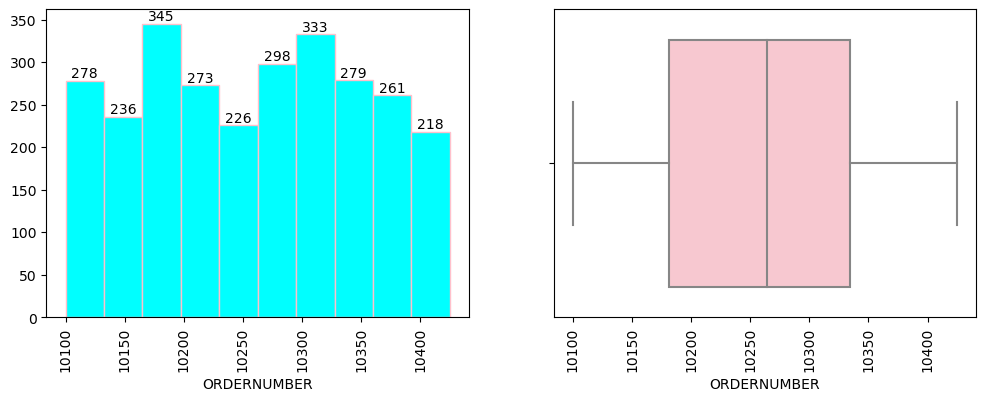

Skewness of QUANTITYORDERED:  0.36928635114997327
Distribution of QUANTITYORDERED
----------------------------------------------------------------------------


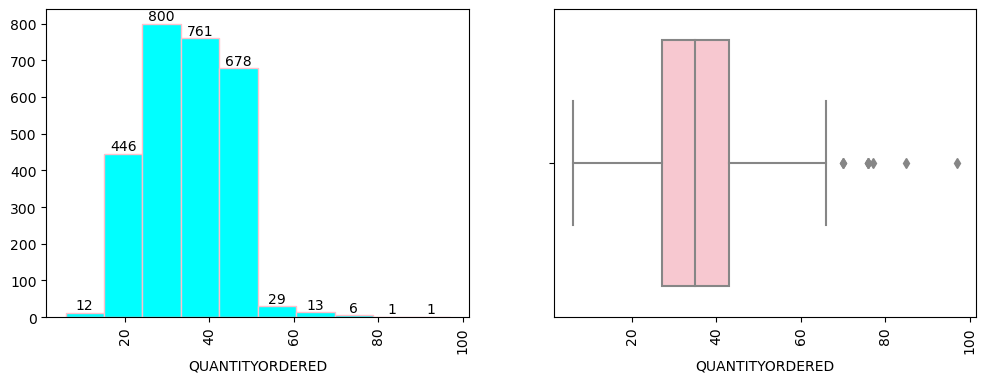

Skewness of PRICEEACH:  0.697221630670249
Distribution of PRICEEACH
----------------------------------------------------------------------------


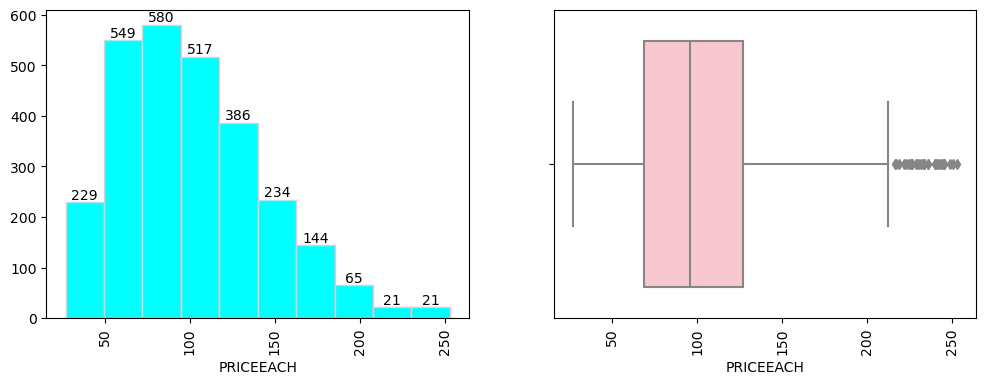

Skewness of ORDERLINENUMBER:  0.5753267852667886
Distribution of ORDERLINENUMBER
----------------------------------------------------------------------------


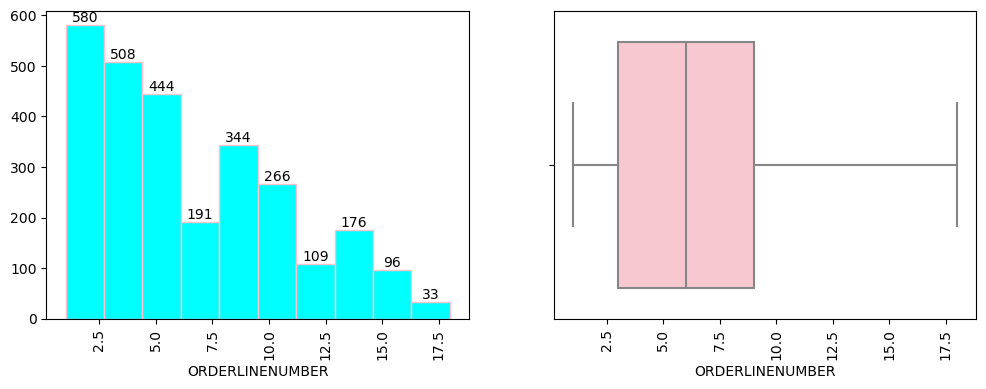

Skewness of SALES:  1.1559397878548436
Distribution of SALES
----------------------------------------------------------------------------


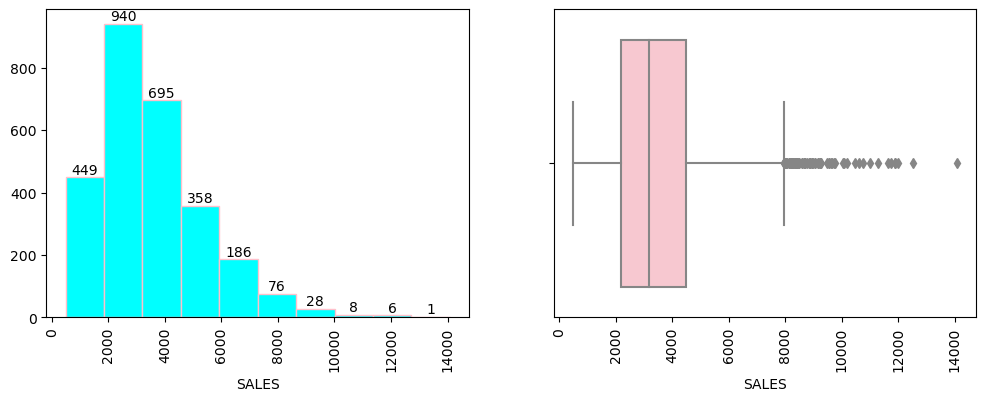

Skewness of DAYS_SINCE_LASTORDER:  -0.0029834081469109694
Distribution of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------


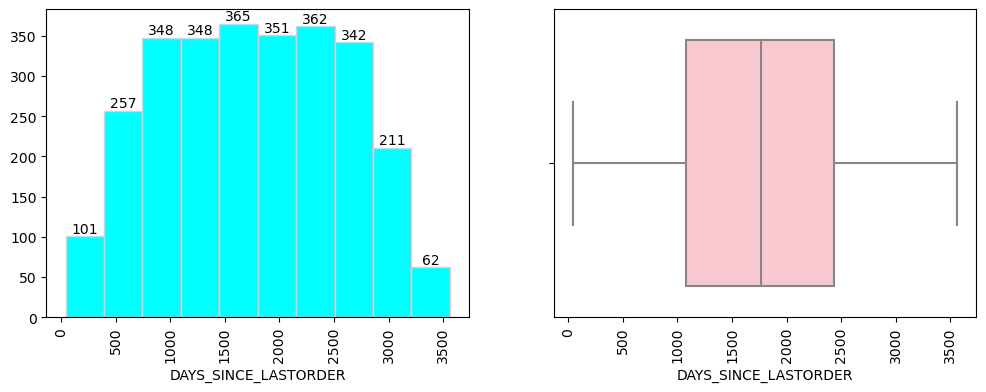

Skewness of MSRP:  0.5756463776894681
Distribution of MSRP
----------------------------------------------------------------------------


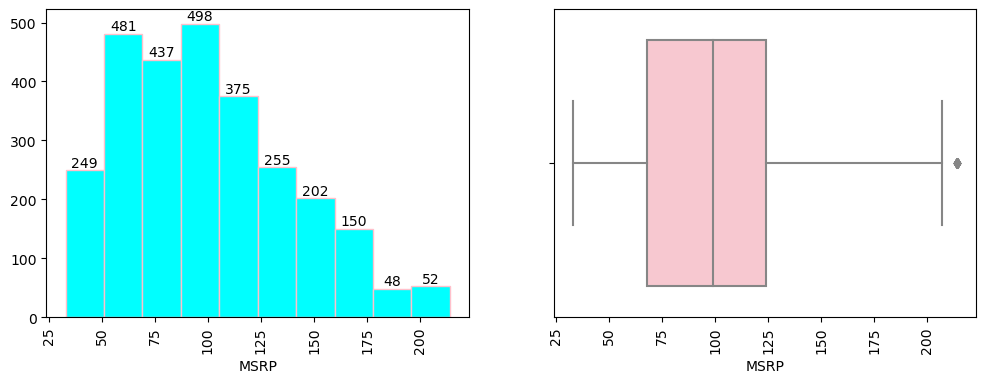

In [6]:
#defining a function for univariate analysis of numeric columns
def univariateAnalysis_numeric(df,column):
    print(f'Skewness of {column}: ', df[column].skew())
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")

    # Calculate min and max values for the column
    a = round(df[column].min())
    b = round(df[column].max())
    # Plot histogram with annotations
    freq, bins, patches = axs[0].hist(df[column], range=[a, b], edgecolor='pink', color='cyan')
    bin_centers = np.diff(bins) * 0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
        height = int(freq[n])
        axs[0].annotate("{}".format(height),
                    xy=(x, height),  # top left corner of the histogram bar
                    xytext=(0, 0.2),  # offsetting label position above its bar
                    textcoords="offset points",  # Offset (in points) from the *xy* value
                    ha='center', va='bottom')
        n = n + 1
    axs[0].set_xlabel(column)
    axs[0].tick_params(axis='x', labelrotation=90)
        
    # Plot boxplot
    sns.boxplot(x=column, data=df, ax=axs[1], color = 'pink')
    axs[1].tick_params(axis='x', labelrotation=90)

    # Show the plots
    plt.show()

# calling the function for univariate analysis
for column in sales_data.select_dtypes(include='number').columns:
    univariateAnalysis_numeric(sales_data, column)

#### Key Observations
* For most items quantity ordered is between 20 and 50.
* Price of each unit for most products ordered is between 50 and 140.
* Most customers order upto 6 products in a single order.
* Sales value for most products ordered is between 2000 annd 4000.
* Reordering time for customers is very high ranging from 500 to 3000 days.
#### For Categorical Variables

In [8]:
# defining the function
def univariateAnalysis_category(df, cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df[cat_column].value_counts())
    plt.figure()
    plt.figure(figsize=(6, 4))
    plots = df[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
    plt.show()
    print("       ")

Details of ORDERDATE
----------------------------------------------------------------
ORDERDATE
2018-11-14    38
2019-11-24    35
2018-11-12    34
2019-11-17    32
2019-11-04    29
              ..
2020-02-08     1
2018-10-10     1
2019-02-02     1
2019-08-28     1
2018-04-21     1
Name: count, Length: 246, dtype: int64


<Figure size 640x480 with 0 Axes>

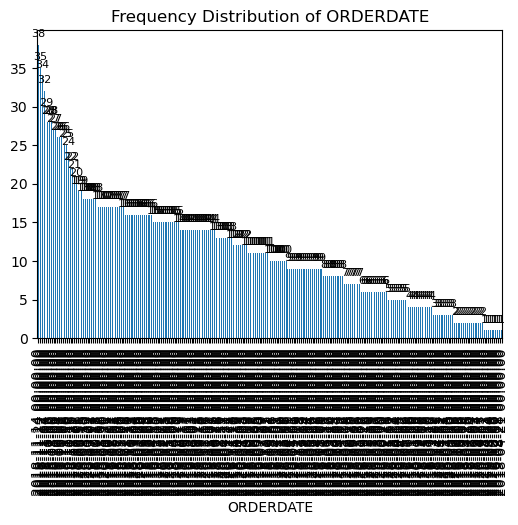

       
Details of STATUS
----------------------------------------------------------------
STATUS
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

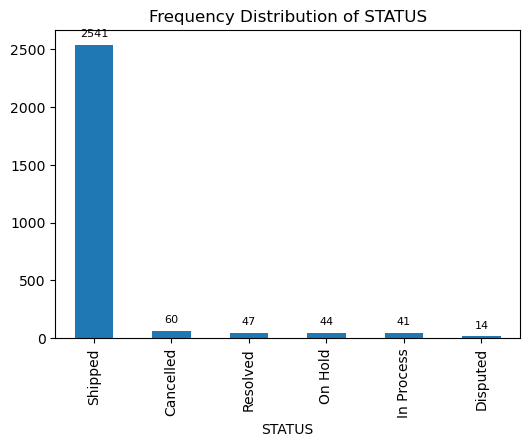

       
Details of PRODUCTLINE
----------------------------------------------------------------
PRODUCTLINE
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

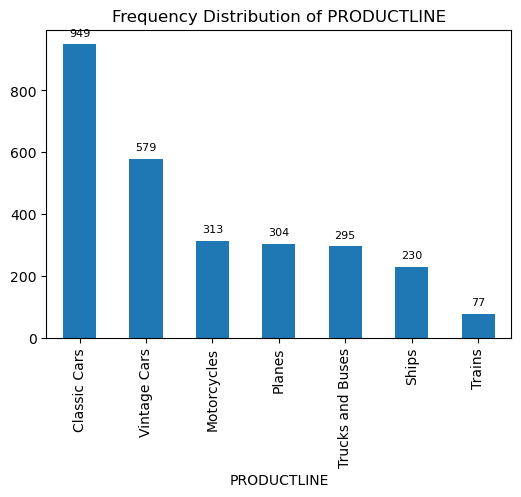

       
Details of PRODUCTCODE
----------------------------------------------------------------
PRODUCTCODE
S18_3232    51
S32_2509    28
S50_1392    28
S24_2840    28
S24_1444    28
            ..
S24_2887    22
S18_2248    21
S18_1749    21
S18_4409    21
S24_3969    21
Name: count, Length: 109, dtype: int64


<Figure size 640x480 with 0 Axes>

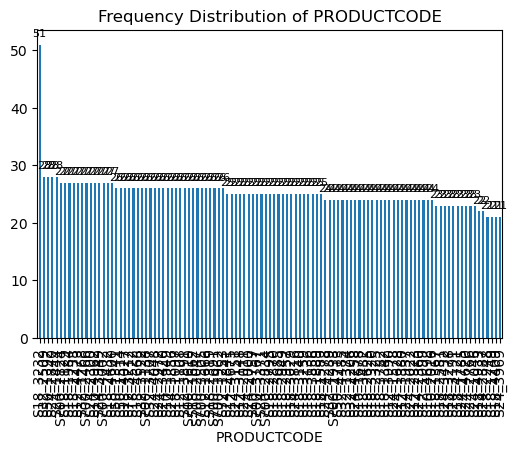

       
Details of CUSTOMERNAME
----------------------------------------------------------------
CUSTOMERNAME
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: count, Length: 89, dtype: int64


<Figure size 640x480 with 0 Axes>

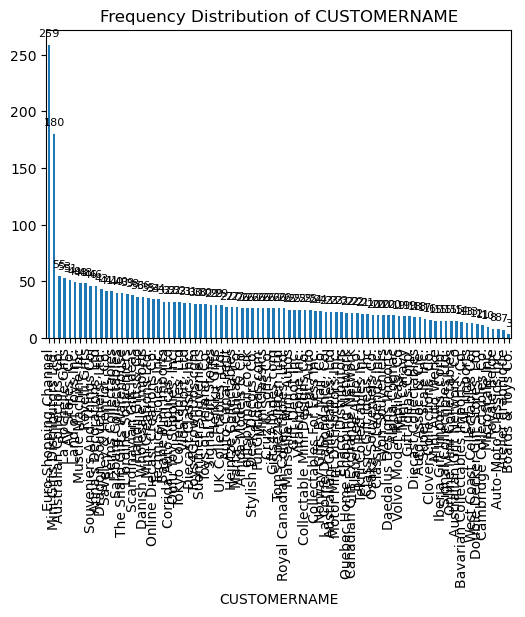

       
Details of PHONE
----------------------------------------------------------------
PHONE
(91) 555 94 44      259
4155551450          180
03 9520 4555         55
40.67.8555           53
6175558555           51
                   ... 
2125551957           10
(071) 23 67 2555      8
6175558428            8
40.32.2555            7
3105552373            3
Name: count, Length: 88, dtype: int64


<Figure size 640x480 with 0 Axes>

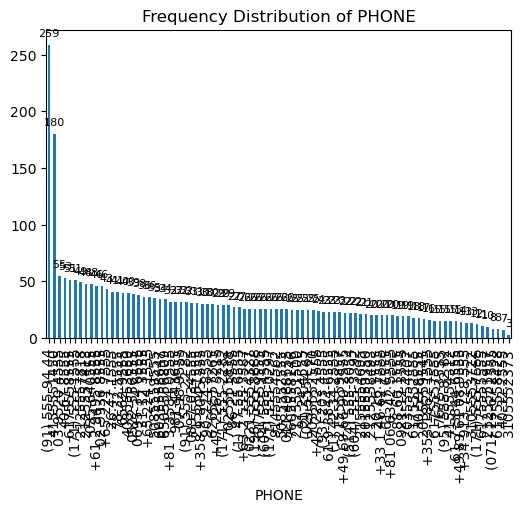

       
Details of ADDRESSLINE1
----------------------------------------------------------------
ADDRESSLINE1
C/ Moralzarzal, 86              259
5677 Strong St.                 180
636 St Kilda Road                55
67, rue des Cinquante Otages     53
Fauntleroy Circus                51
                               ... 
5290 North Pendale Street        10
Boulevard Tirou, 255              8
16780 Pompton St.                 8
54, rue Royale                    7
4097 Douglas Av.                  3
Name: count, Length: 89, dtype: int64


<Figure size 640x480 with 0 Axes>

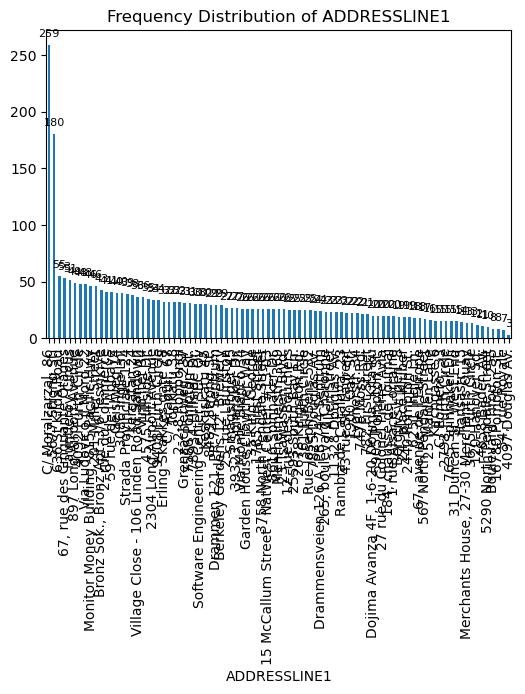

       
Details of CITY
----------------------------------------------------------------
CITY
Madrid        304
San Rafael    180
NYC           152
Singapore      79
Paris          70
             ... 
Brisbane       15
Sevilla        15
Munich         14
Burbank        13
Charleroi       8
Name: count, Length: 71, dtype: int64


<Figure size 640x480 with 0 Axes>

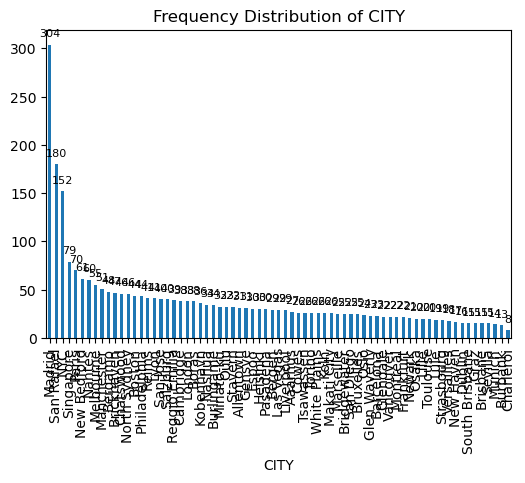

       
Details of POSTALCODE
----------------------------------------------------------------
POSTALCODE
28034      259
97562      205
10022      152
94217       89
50553       61
          ... 
4101        15
80686       14
WA1 1DP     12
B-6000       8
92561        3
Name: count, Length: 73, dtype: int64


<Figure size 640x480 with 0 Axes>

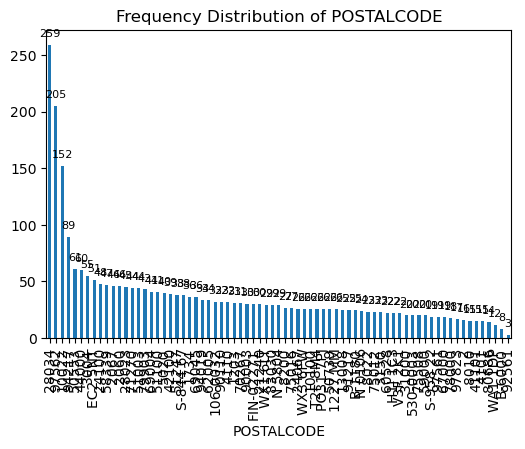

       
Details of COUNTRY
----------------------------------------------------------------
COUNTRY
USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

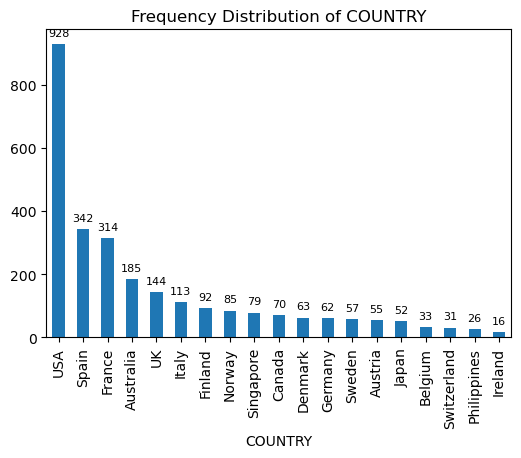

       
Details of CONTACTLASTNAME
----------------------------------------------------------------
CONTACTLASTNAME
Freyre      259
Nelson      204
Young       115
Frick        91
Yu           80
           ... 
Hardy        12
Tseng        11
Kuo          10
Cartrain      8
Schmitt       7
Name: count, Length: 76, dtype: int64


<Figure size 640x480 with 0 Axes>

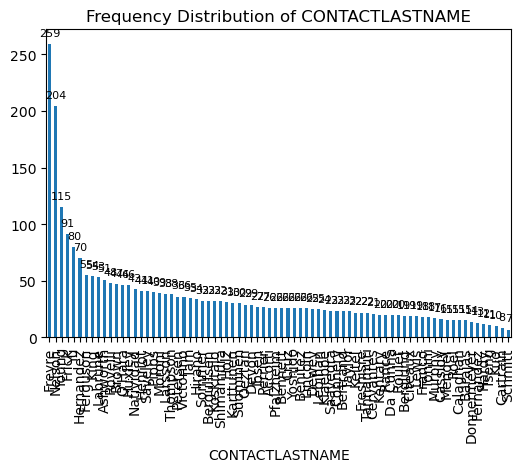

       
Details of CONTACTFIRSTNAME
----------------------------------------------------------------
CONTACTFIRSTNAME
Diego      259
Valarie    257
Sue         84
Michael     70
Juri        60
          ... 
Jesus       13
Thomas      12
Kee         10
Pascale      8
Carine       7
Name: count, Length: 72, dtype: int64


<Figure size 640x480 with 0 Axes>

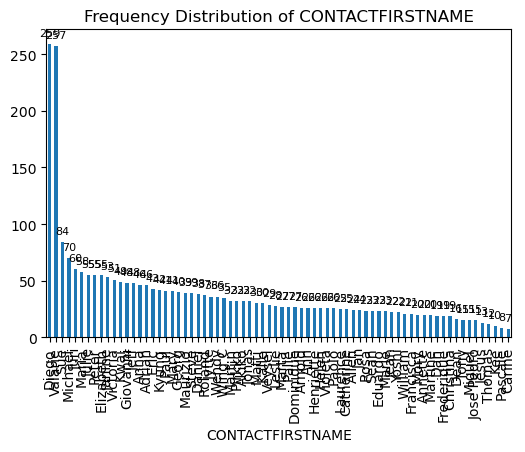

       
Details of DEALSIZE
----------------------------------------------------------------
DEALSIZE
Medium    1349
Small     1246
Large      152
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

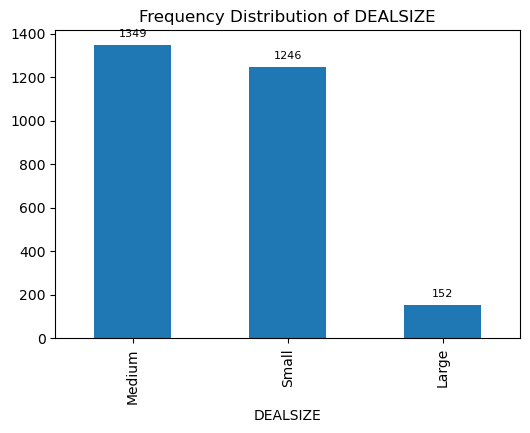

In [9]:
# calling the function
for column in sales_data.select_dtypes(exclude= 'number'):
    univariateAnalysis_category(sales_data, column)

#### Key Observations
* Order status for some orders are cancelled, On Hold or Disputed. For RFM analysis we will also include the orders whose status is cancelled, On Hold or Disputed.
* Most items sold are for Classic cars and Vintage cars category.
* In country terms USA is biggest source of business.
* Most deals are medium sized which is good, however, there are very few large deals.
### Bivariate Analysis
#### Between Numeric Columns

pair plot


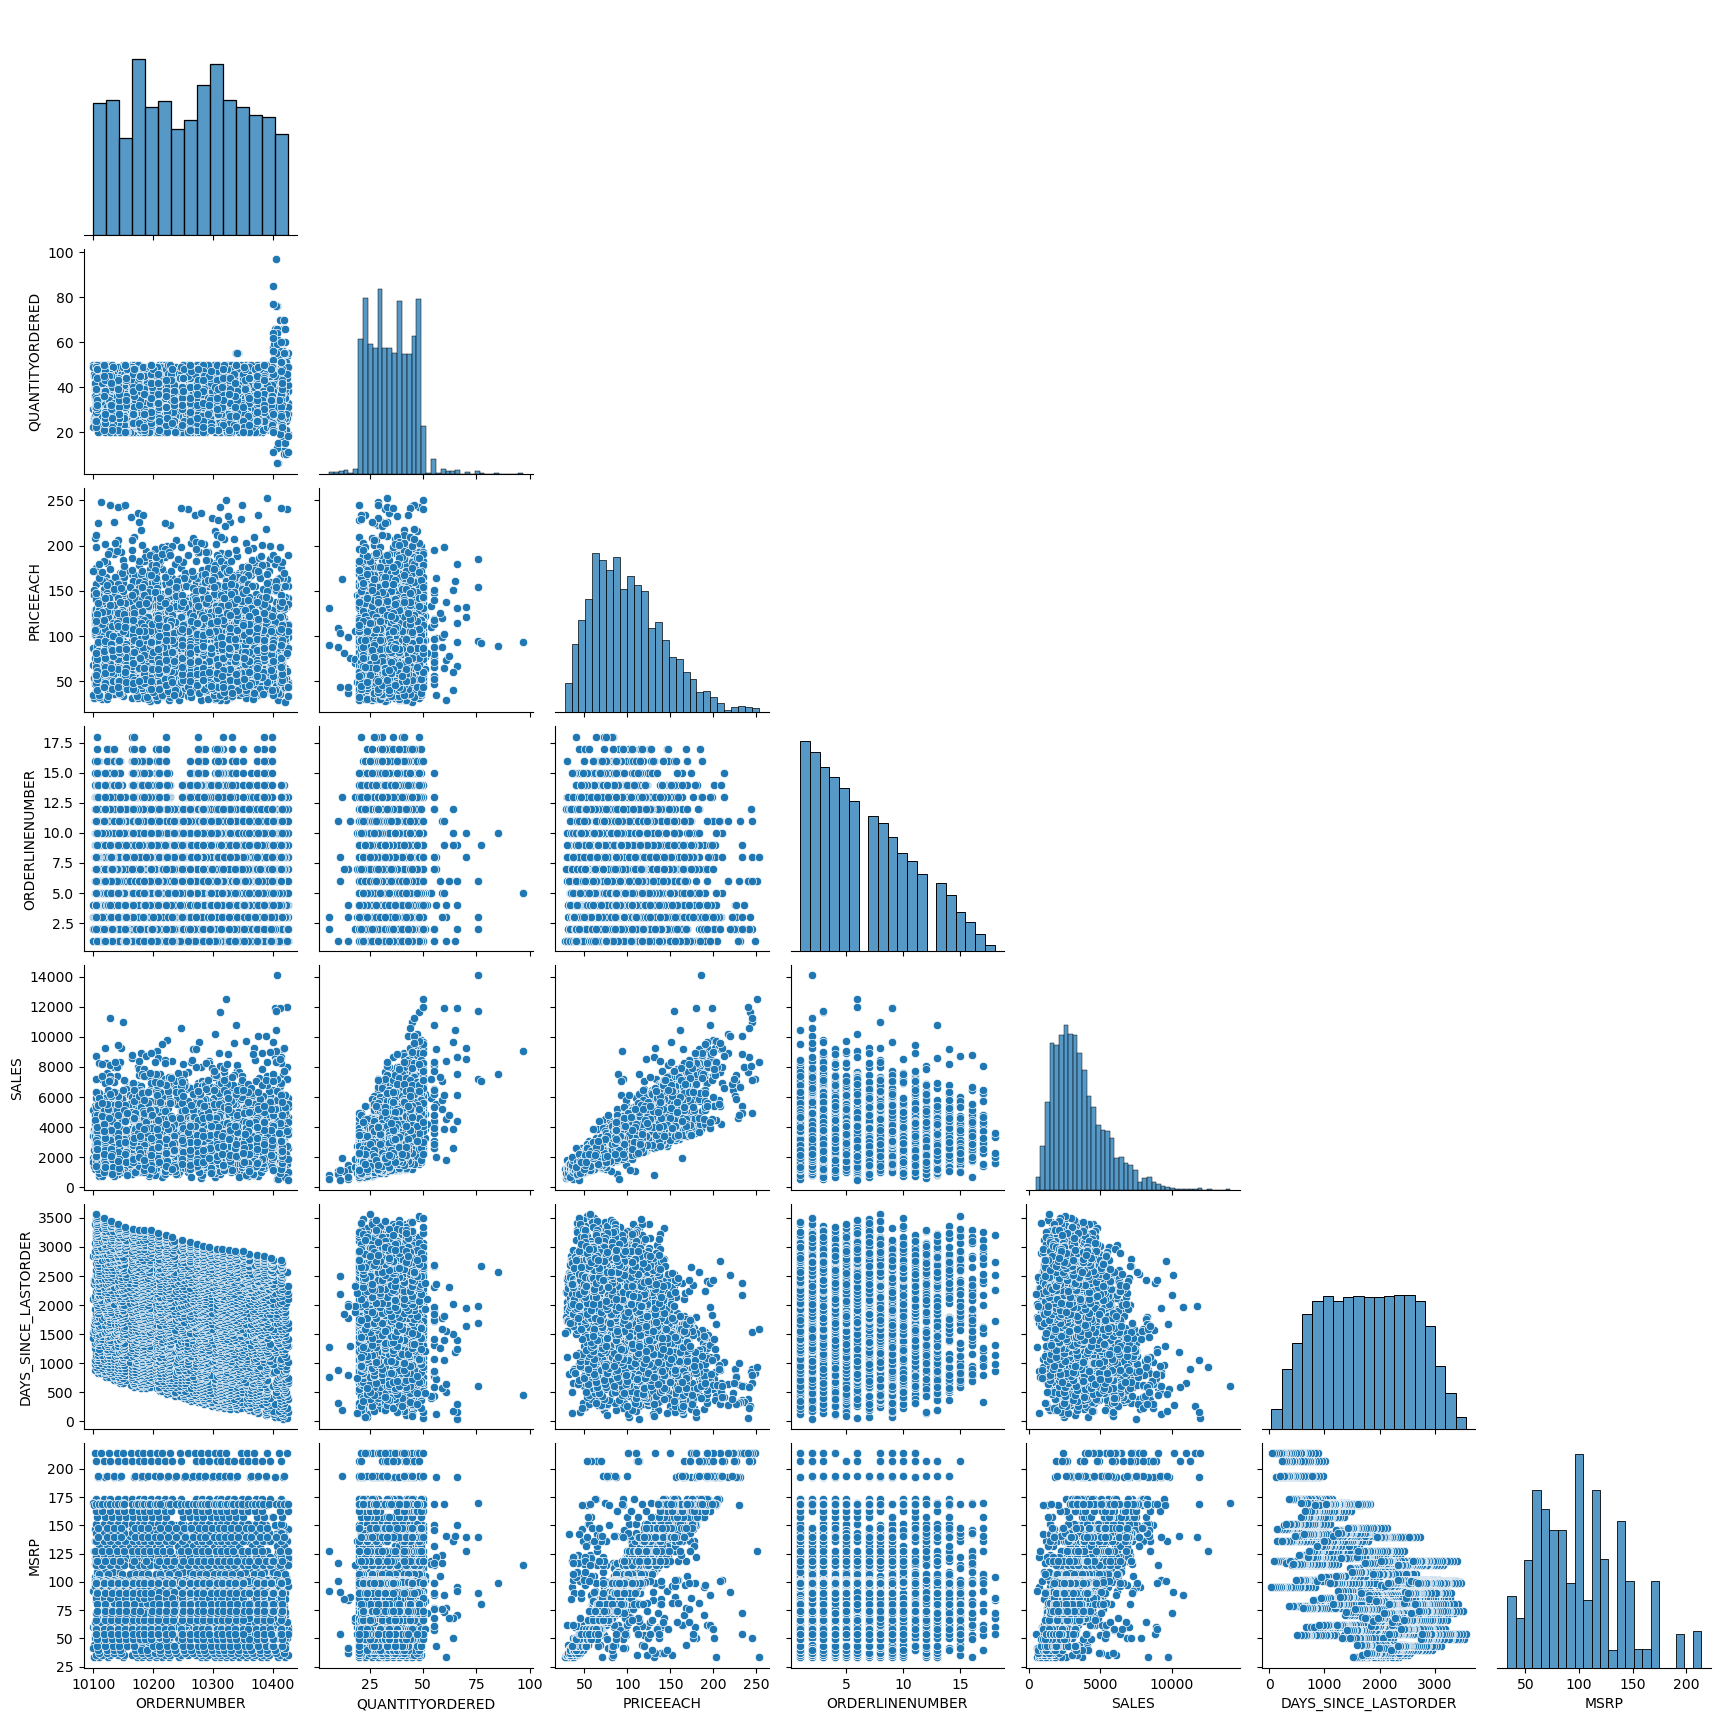

In [9]:
# pairplot
print('pair plot') 
sns.pairplot(data = sales_data, corner = True)
plt.show()

heatmap


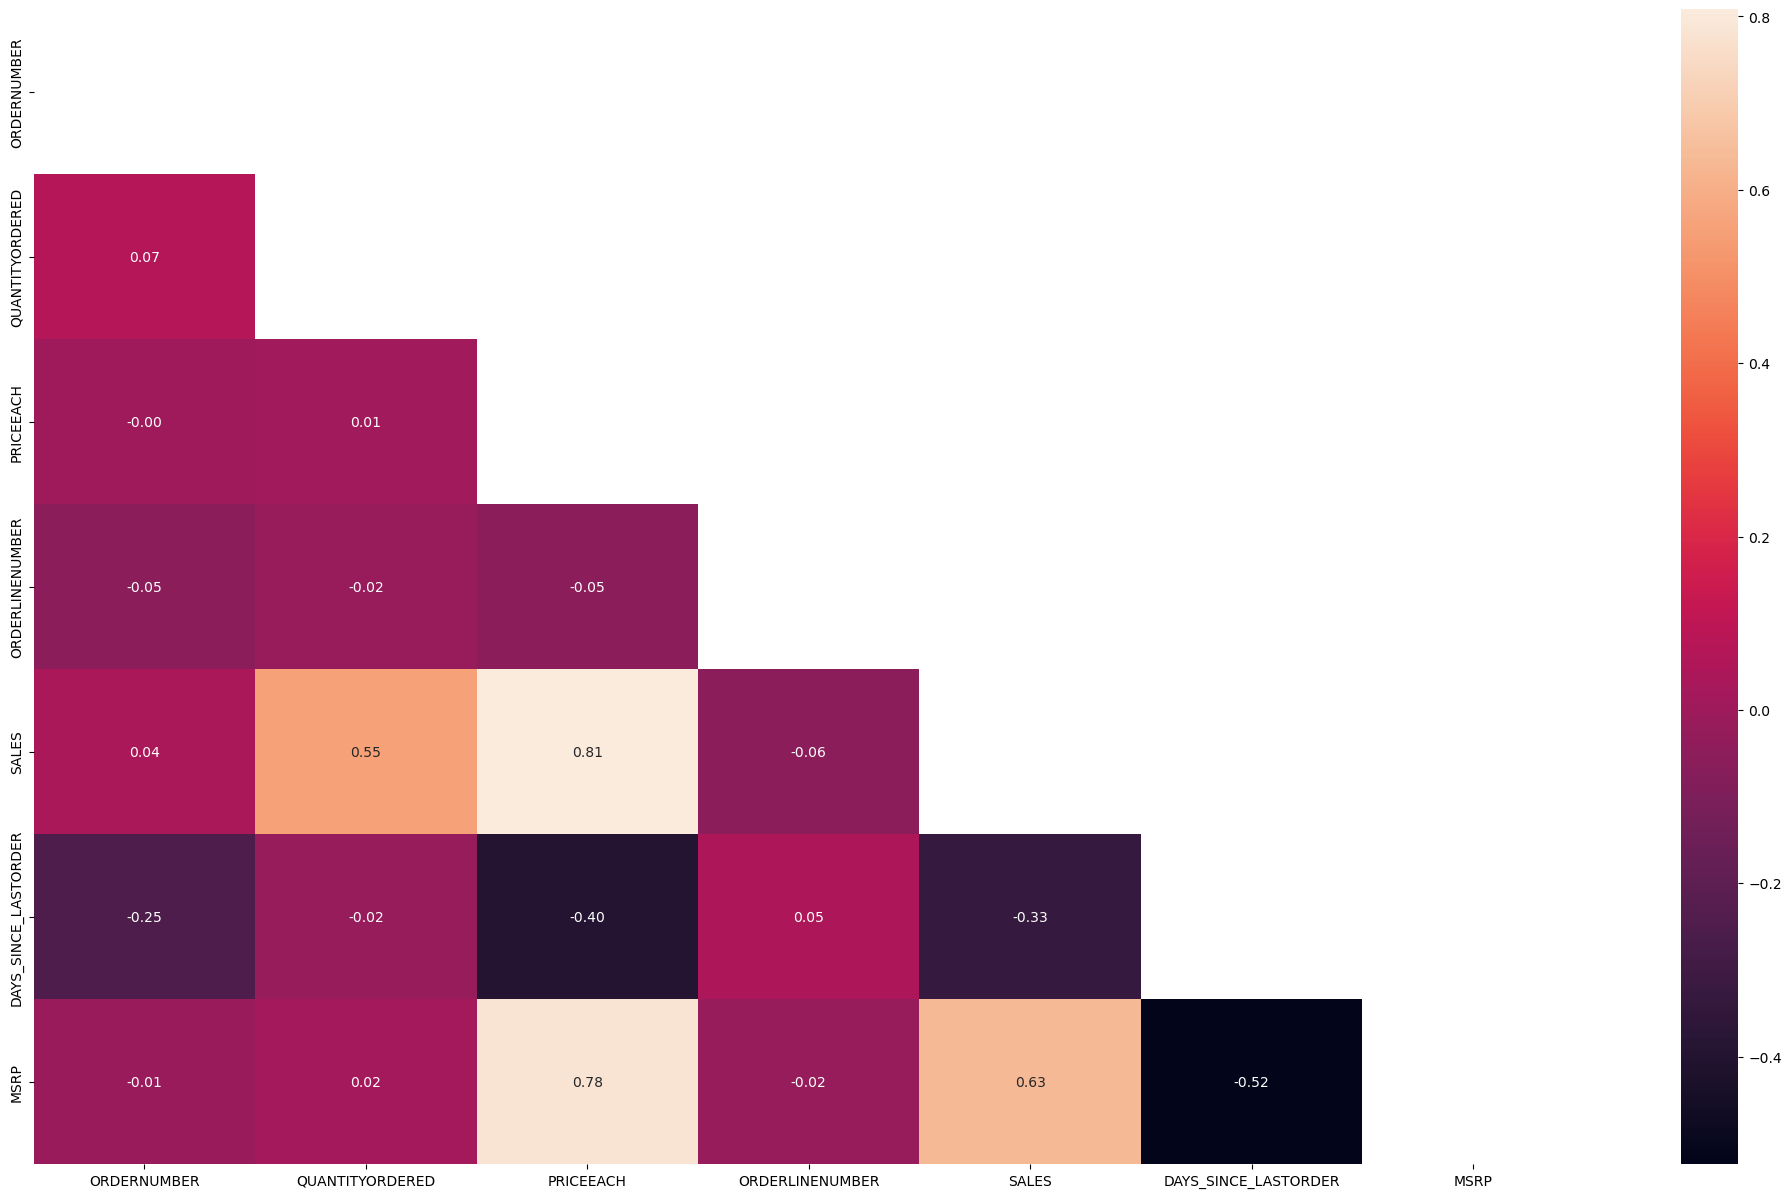

In [10]:
# heatmap
print('heatmap')
corr = sales_data.select_dtypes(include='number').corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(sales_data.select_dtypes(include='number').corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

#### Key Observations
* While there is significant correlation between some expected attributes like Sales, MSRP, Price Each and Quantity Ordered, there is significant inverse correlation between Days Since Last Order and MSRP meaning as purchasinging frequency increases for a customer they purchase more expensive products.
#### Between Numeric and Categorical Columns

In [11]:
# defining the function
def num_cat_bivariate(df, cat_col, numeric_columns):
    # Determine the number of rows and columns needed for subplots
    num_plots = len(numeric_columns)
    num_cols = min(3, num_plots)
    num_rows = math.ceil(num_plots / num_cols)

    # Create subplots
    plt.figure(figsize=(15, num_rows * 4))

    # Plot violin plots for each numeric column
    for i, num_col in enumerate(numeric_columns):
        if i < num_plots:  # Check if we haven't exceeded the number of numeric columns
            plt.subplot(num_rows, num_cols, i+1)
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.title(f'{num_col} vs {cat_col}')
            plt.xticks(rotation=90)  # Rotate x-axis tick labels

    # Adjust layout
    plt.tight_layout()
    plt.show()

bivariate analysis for STATUS


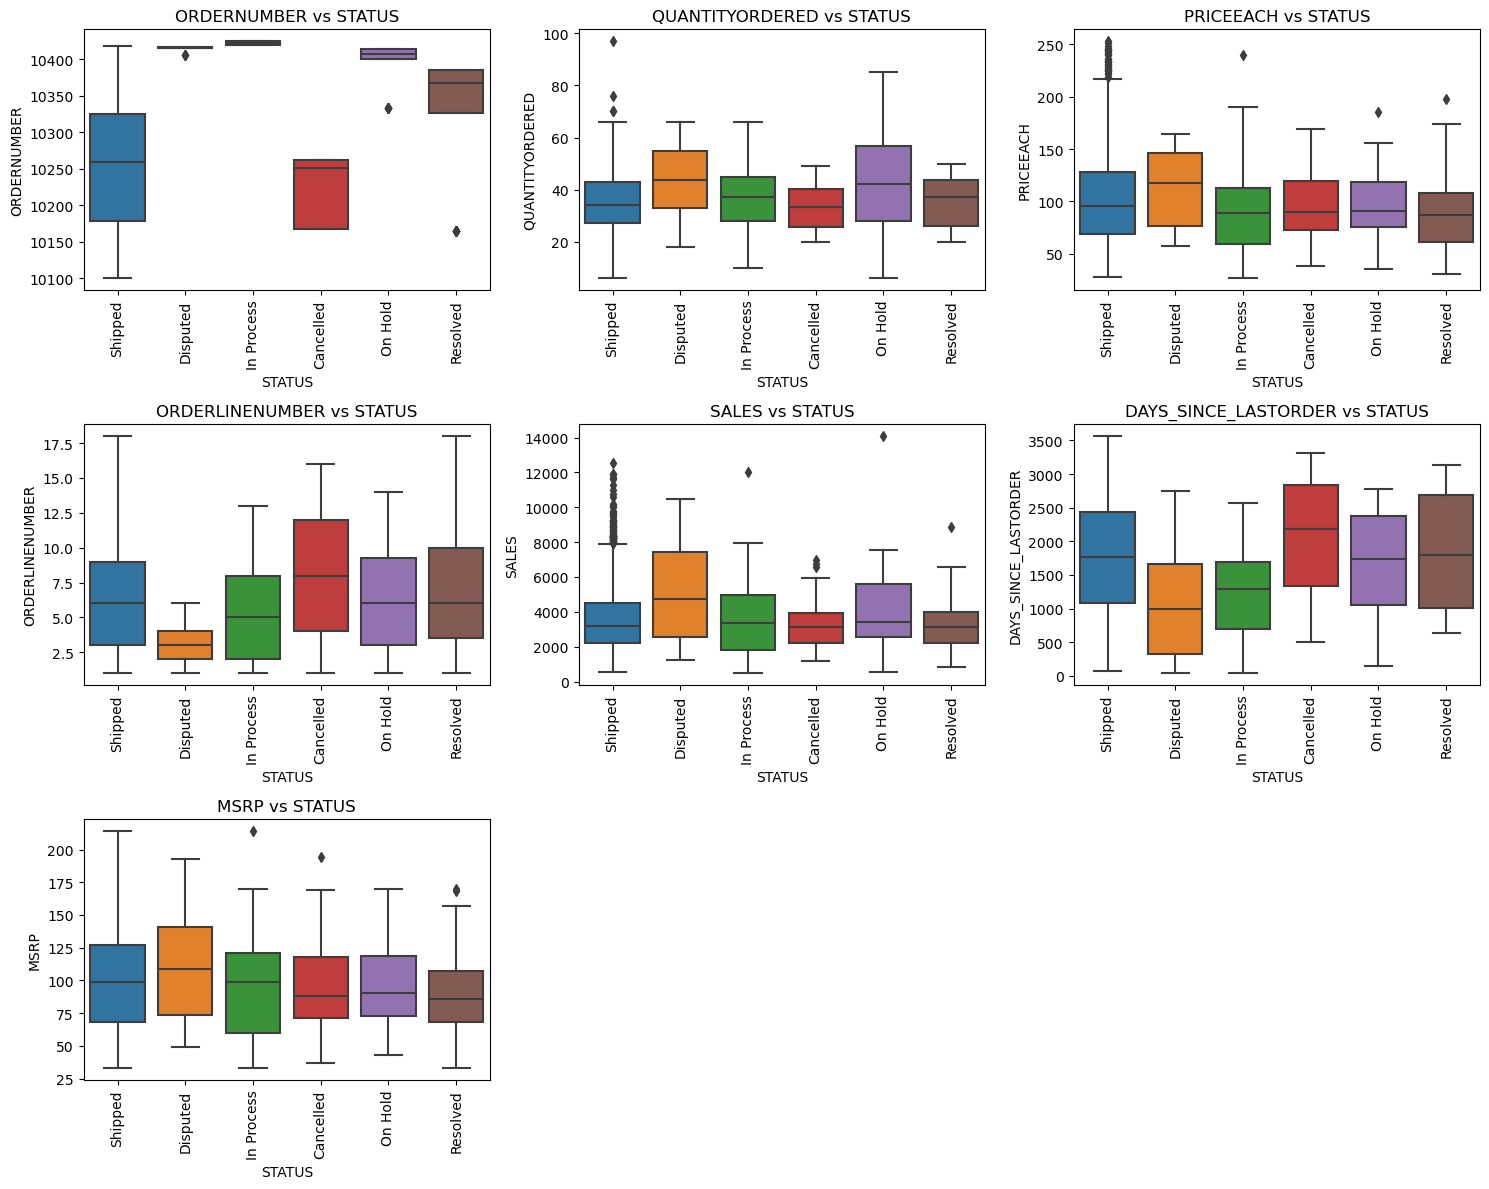



bivariate analysis for PRODUCTLINE


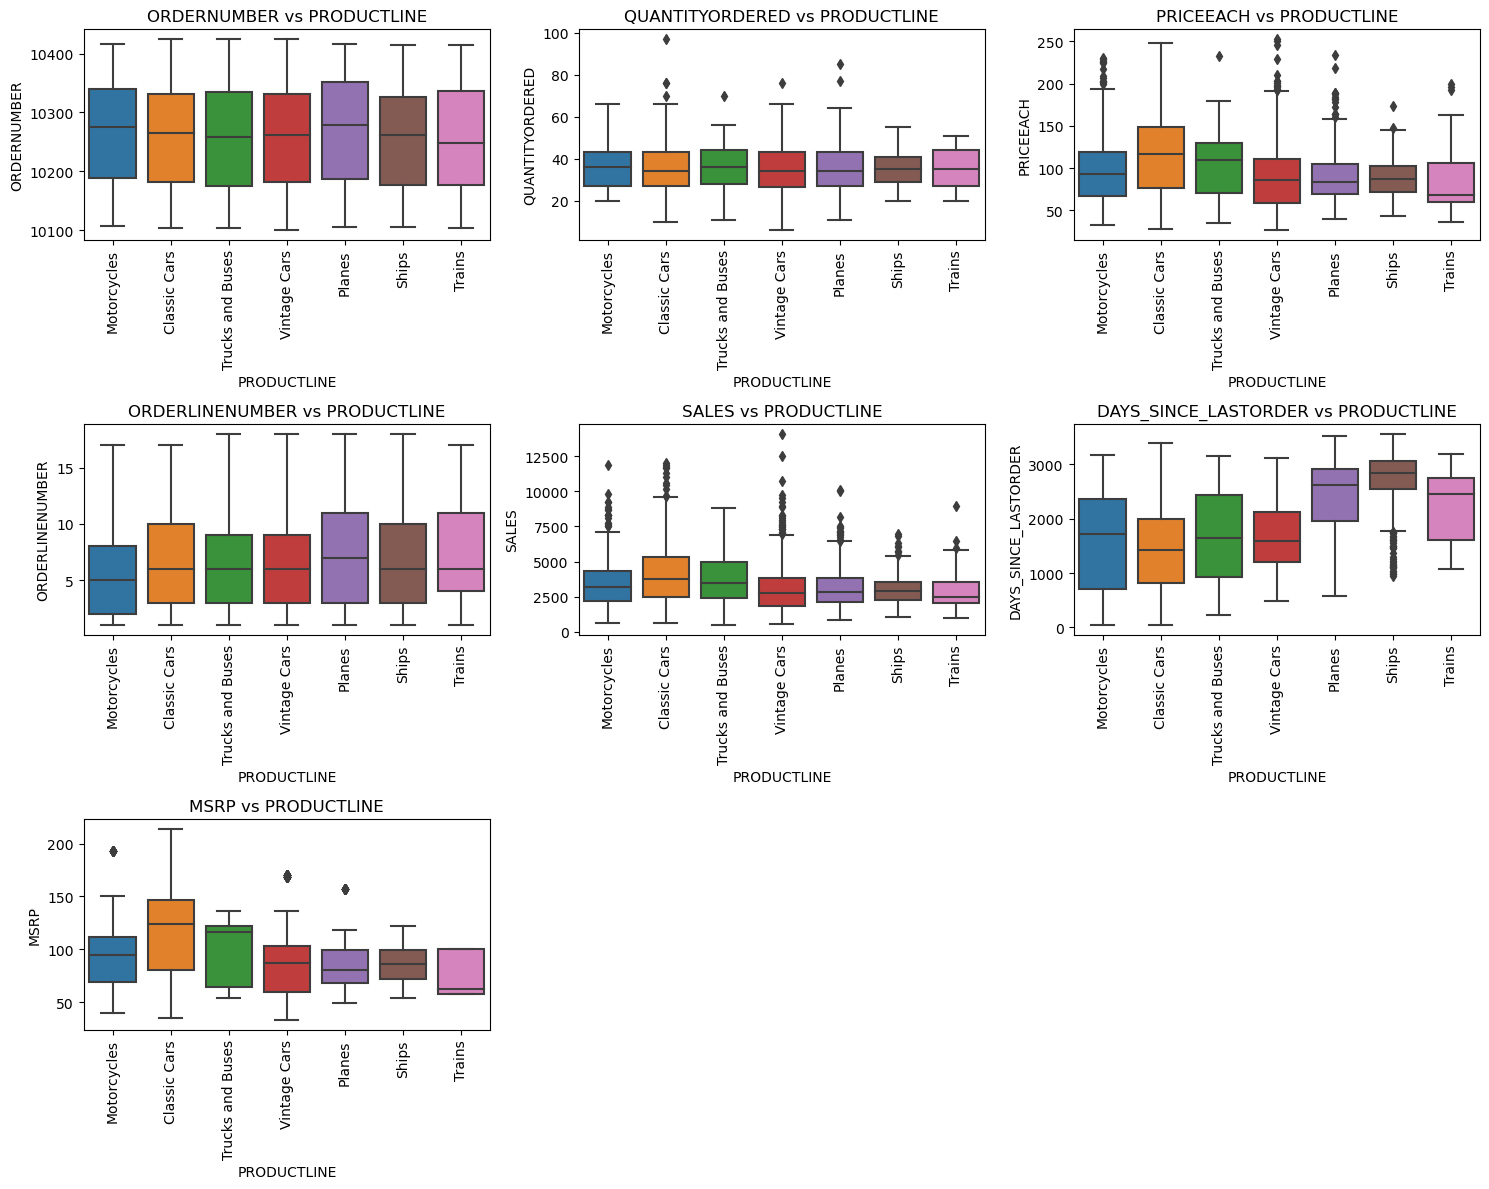



bivariate analysis for PRODUCTCODE


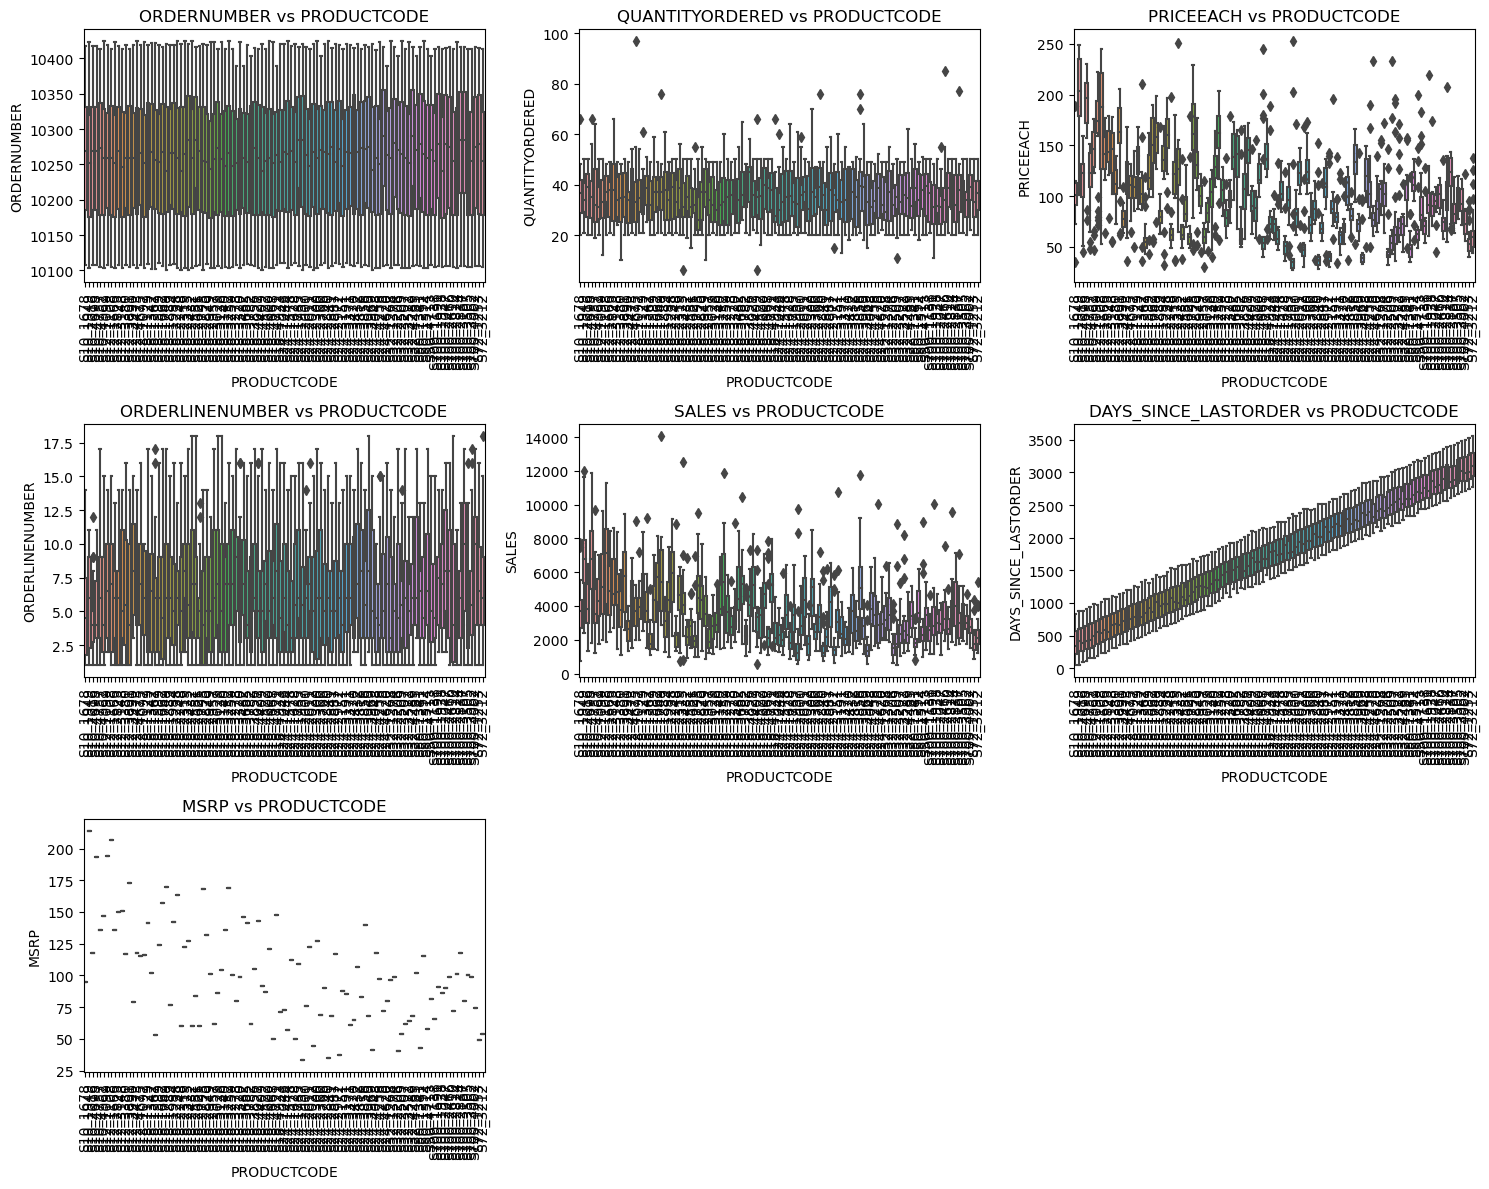



bivariate analysis for CUSTOMERNAME


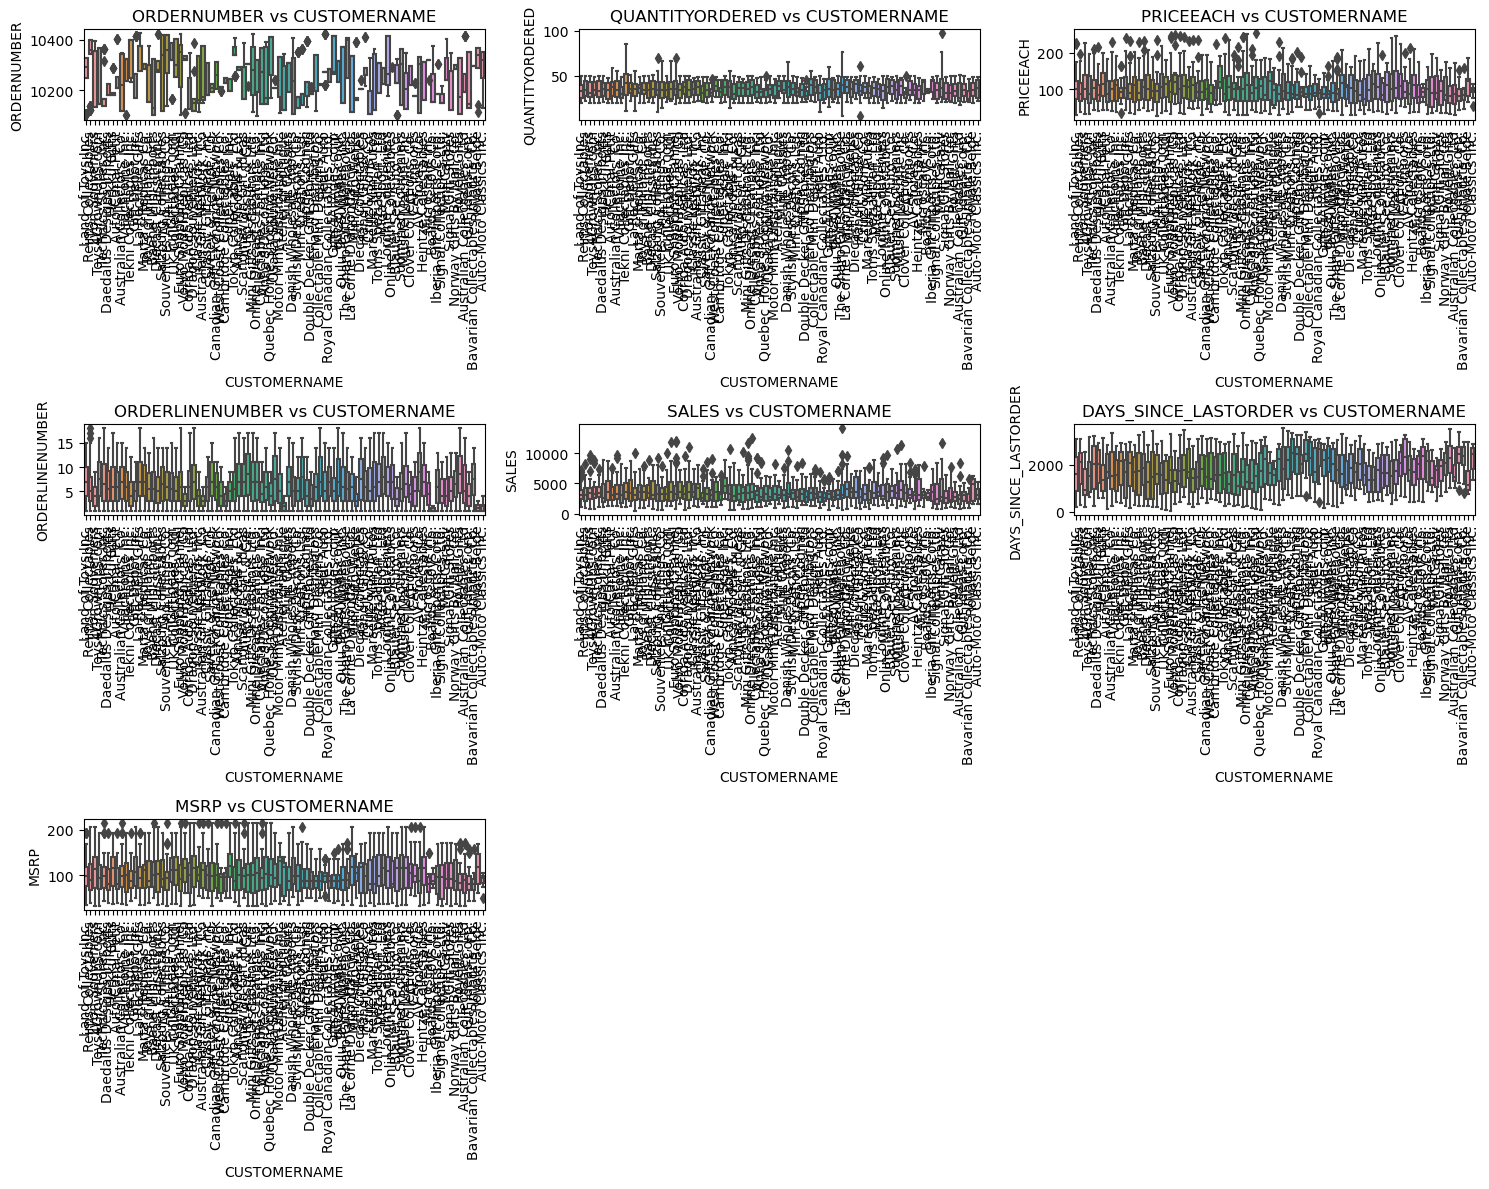



bivariate analysis for PHONE


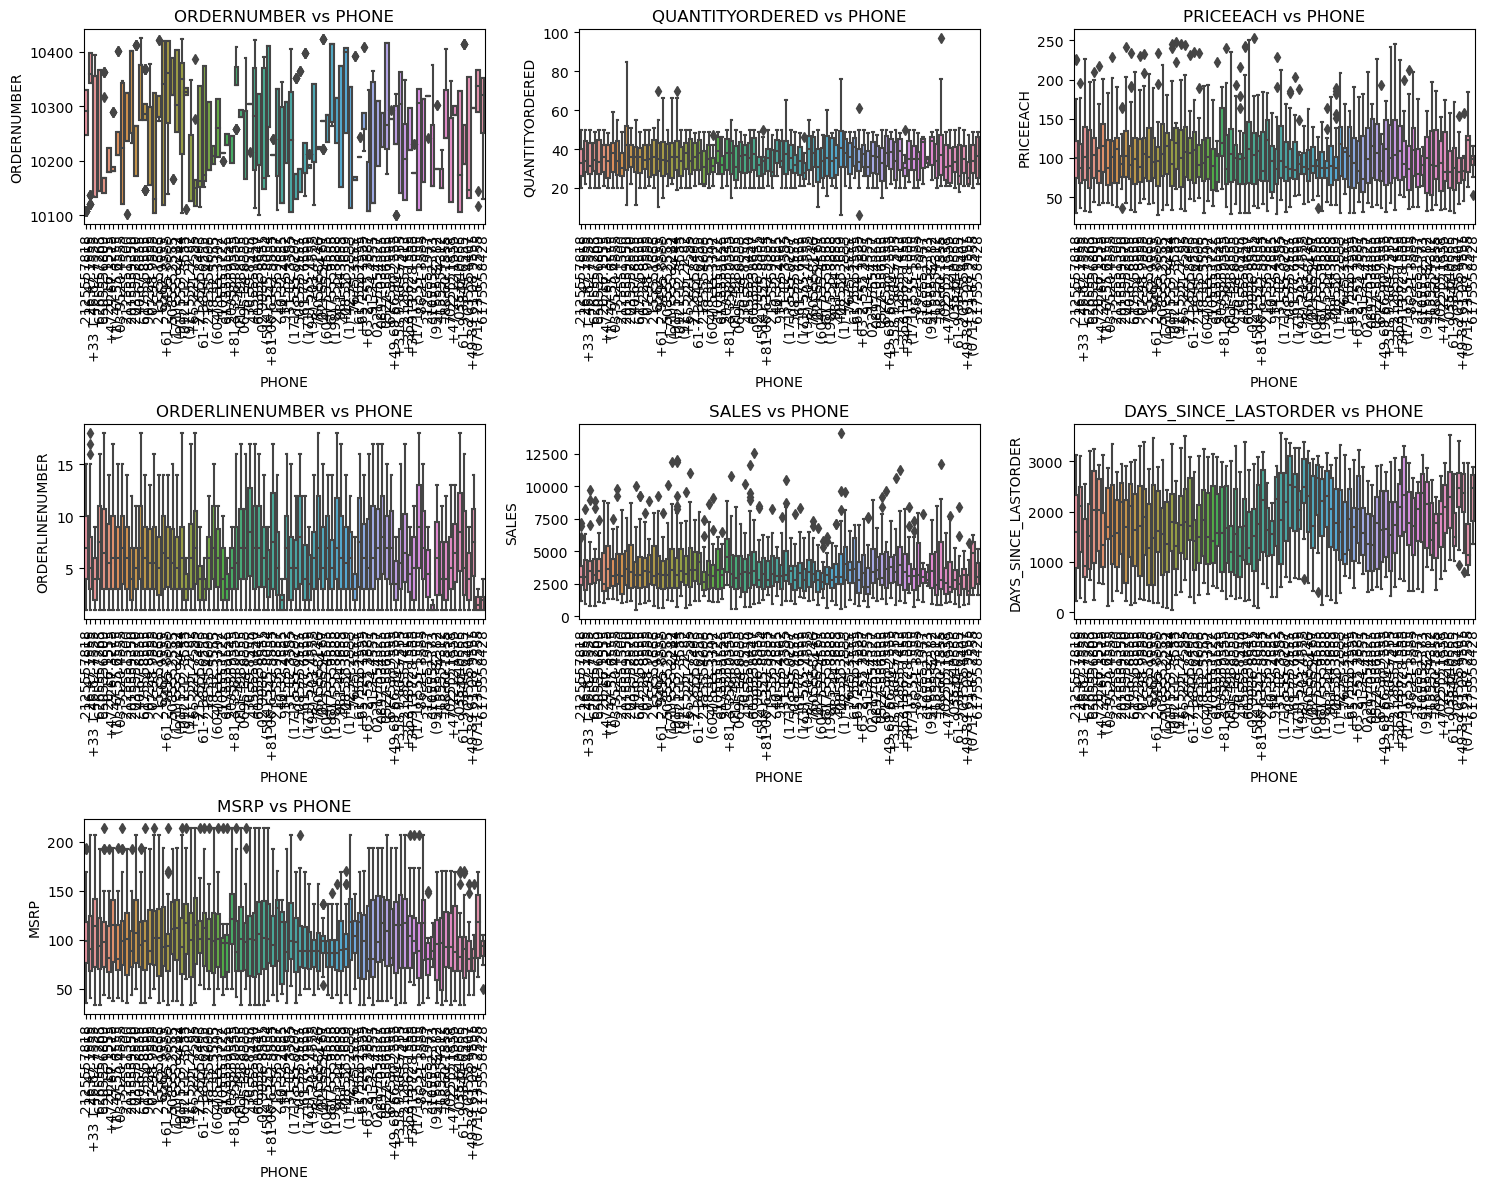



bivariate analysis for ADDRESSLINE1


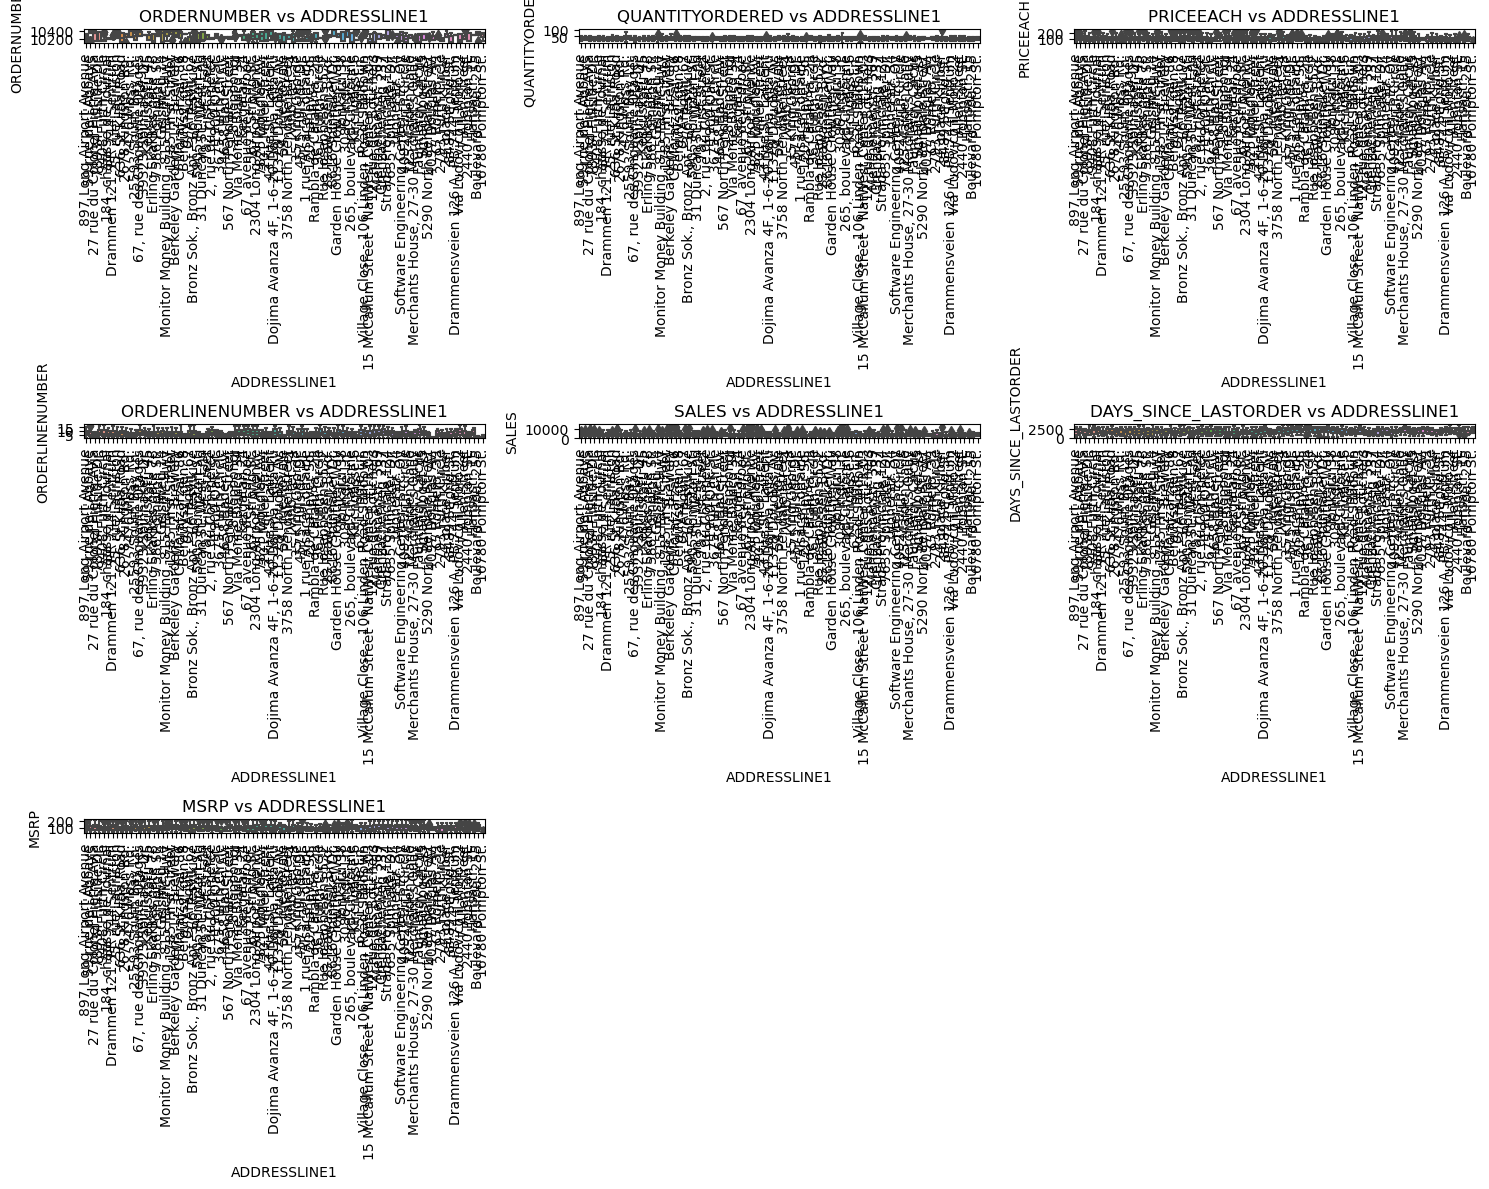



bivariate analysis for CITY


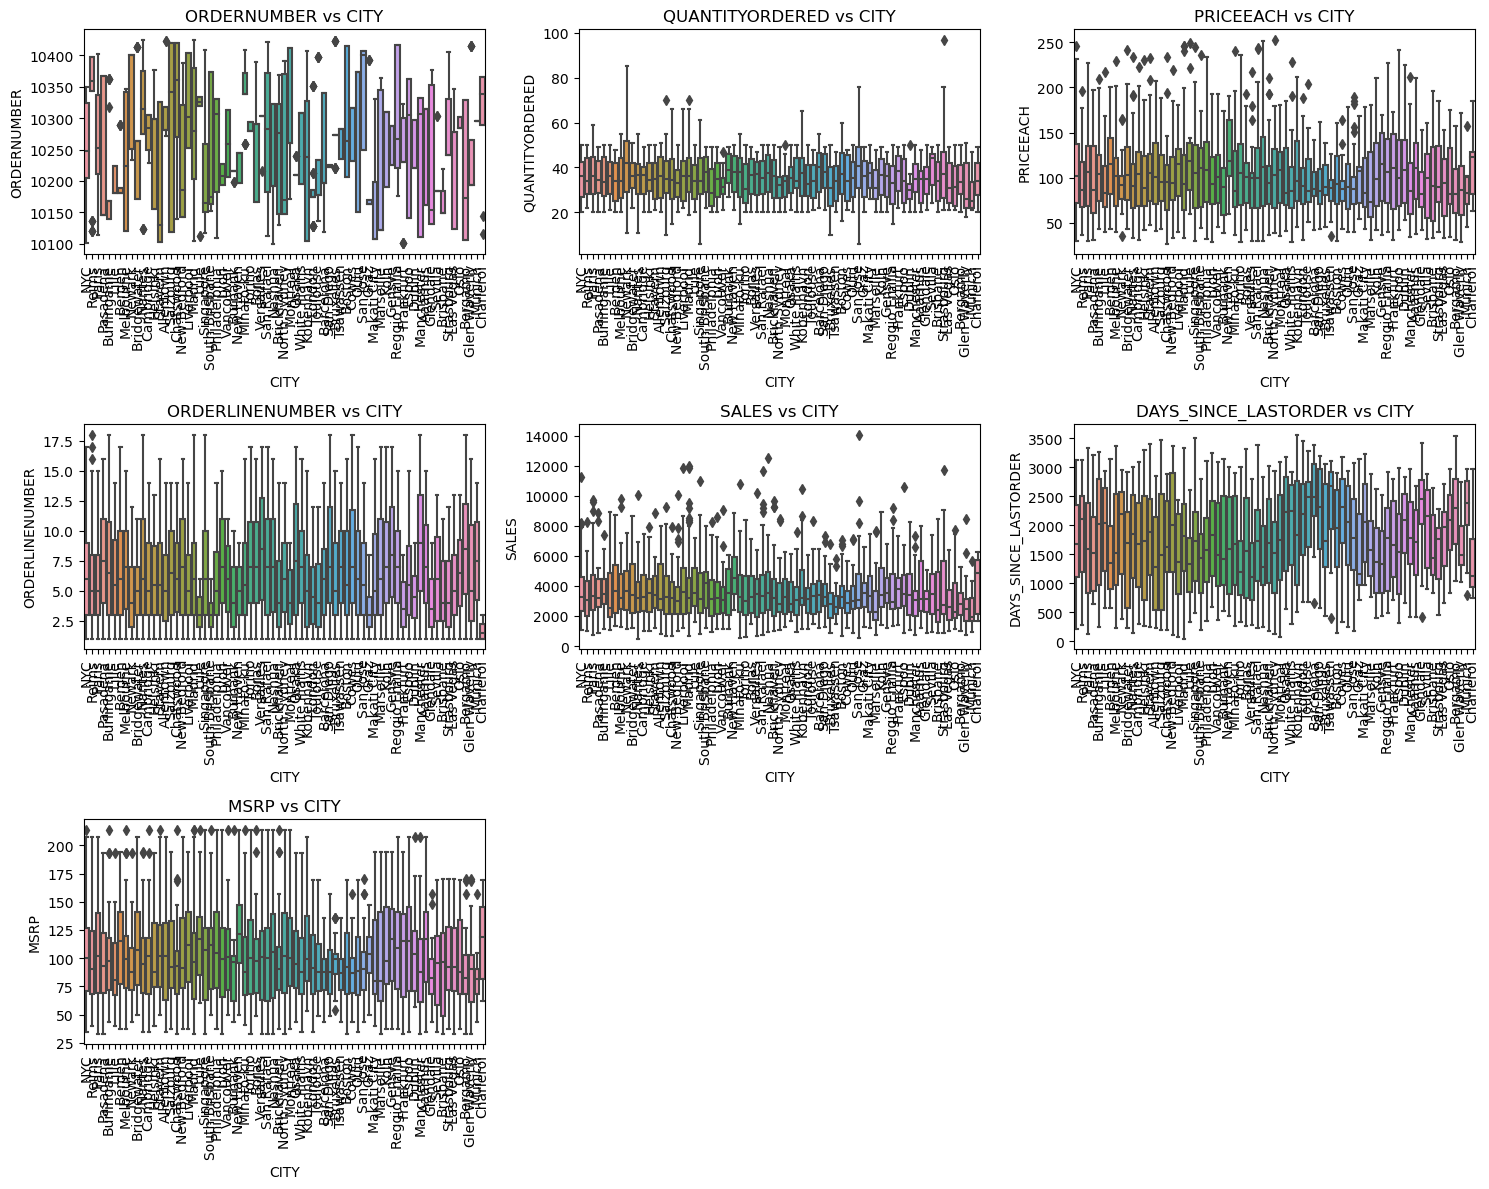



bivariate analysis for POSTALCODE


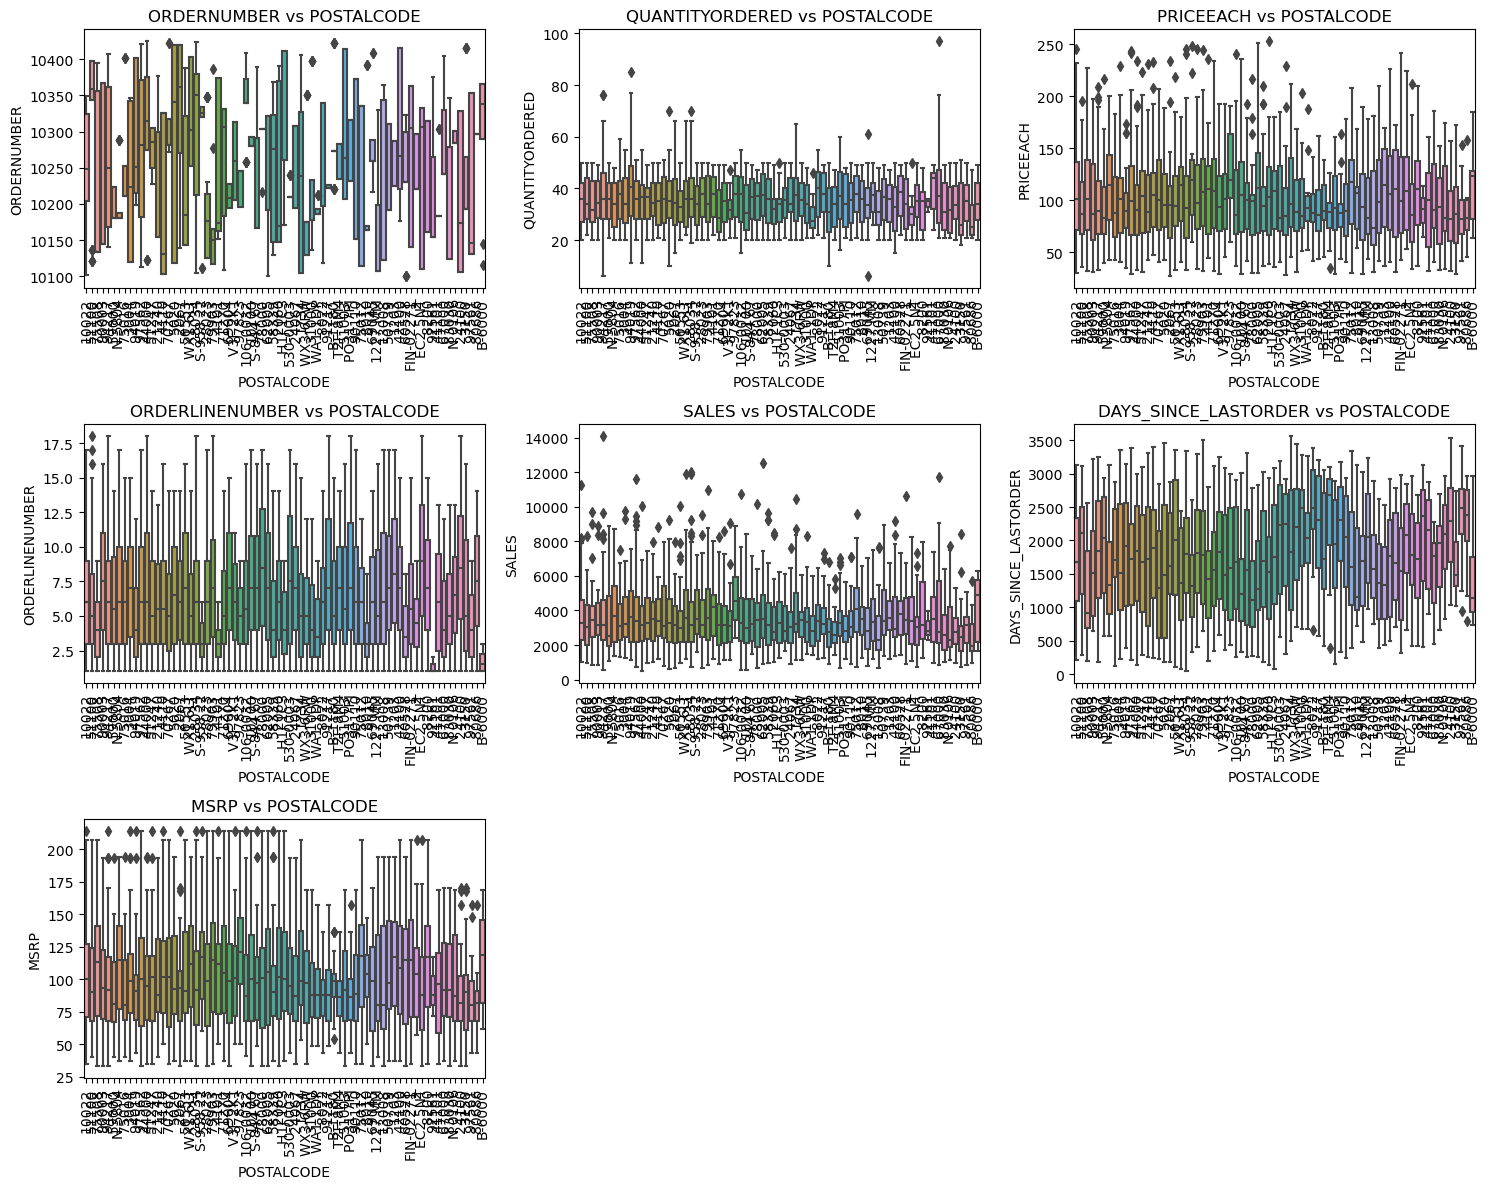



bivariate analysis for COUNTRY


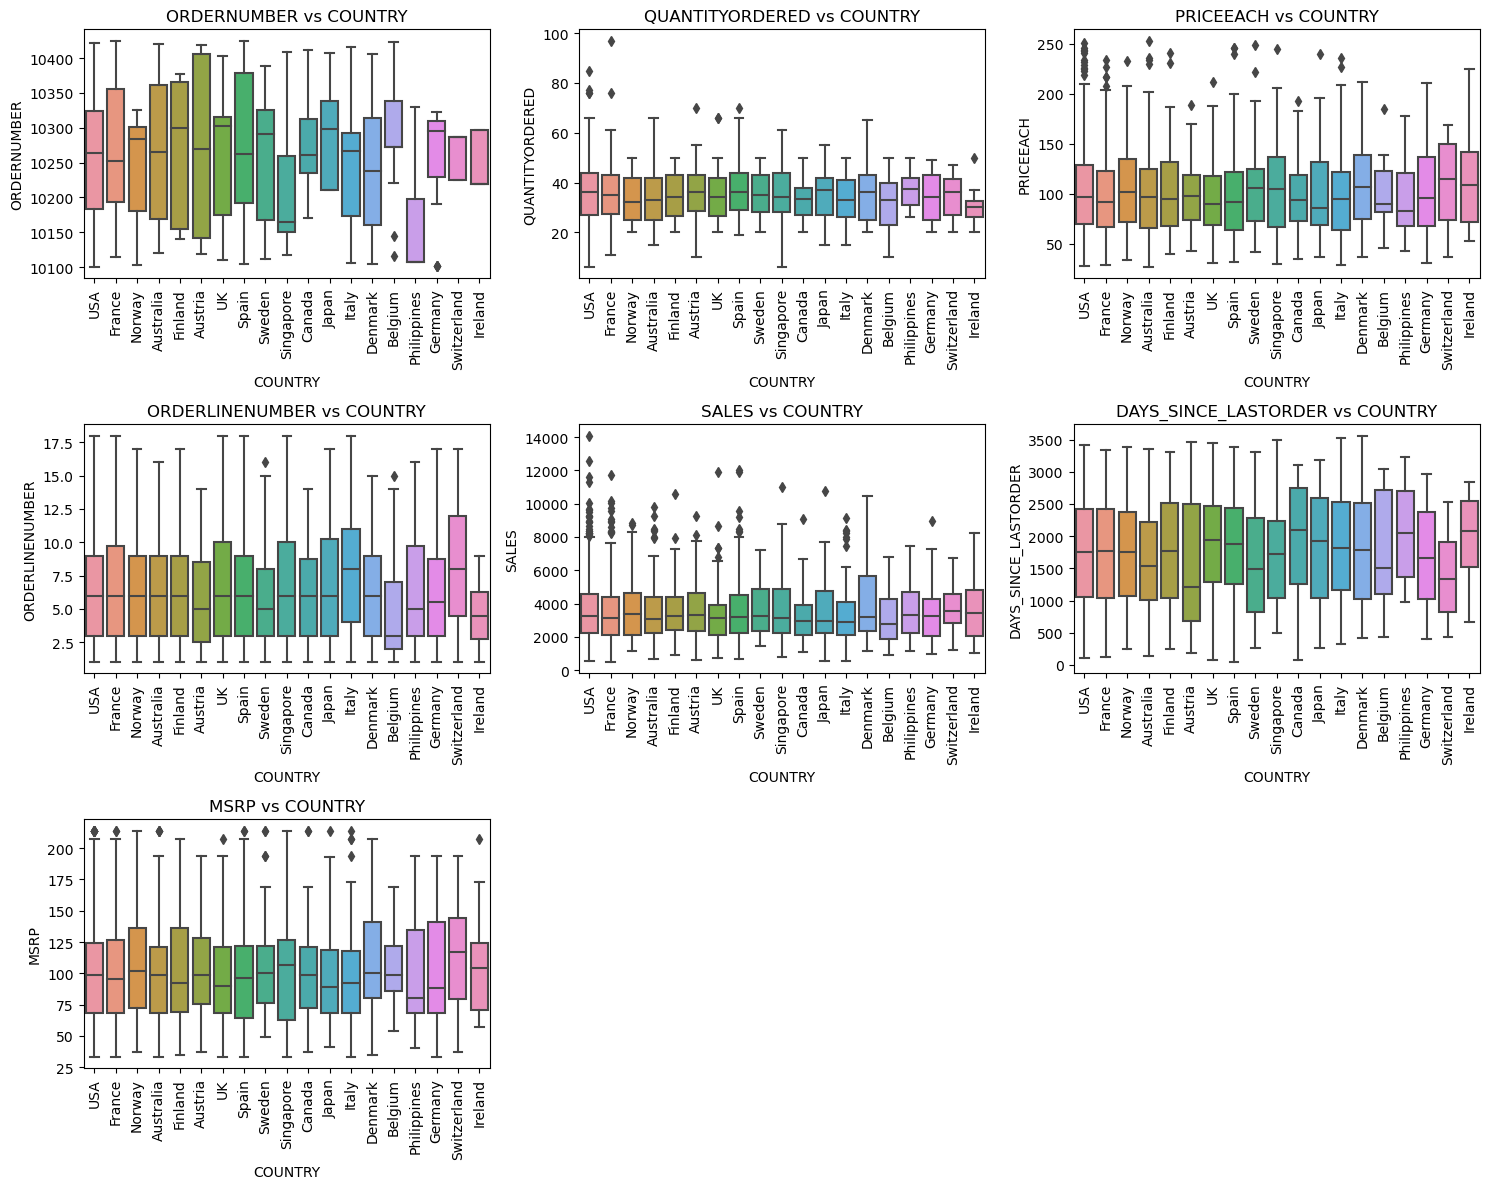



bivariate analysis for CONTACTLASTNAME


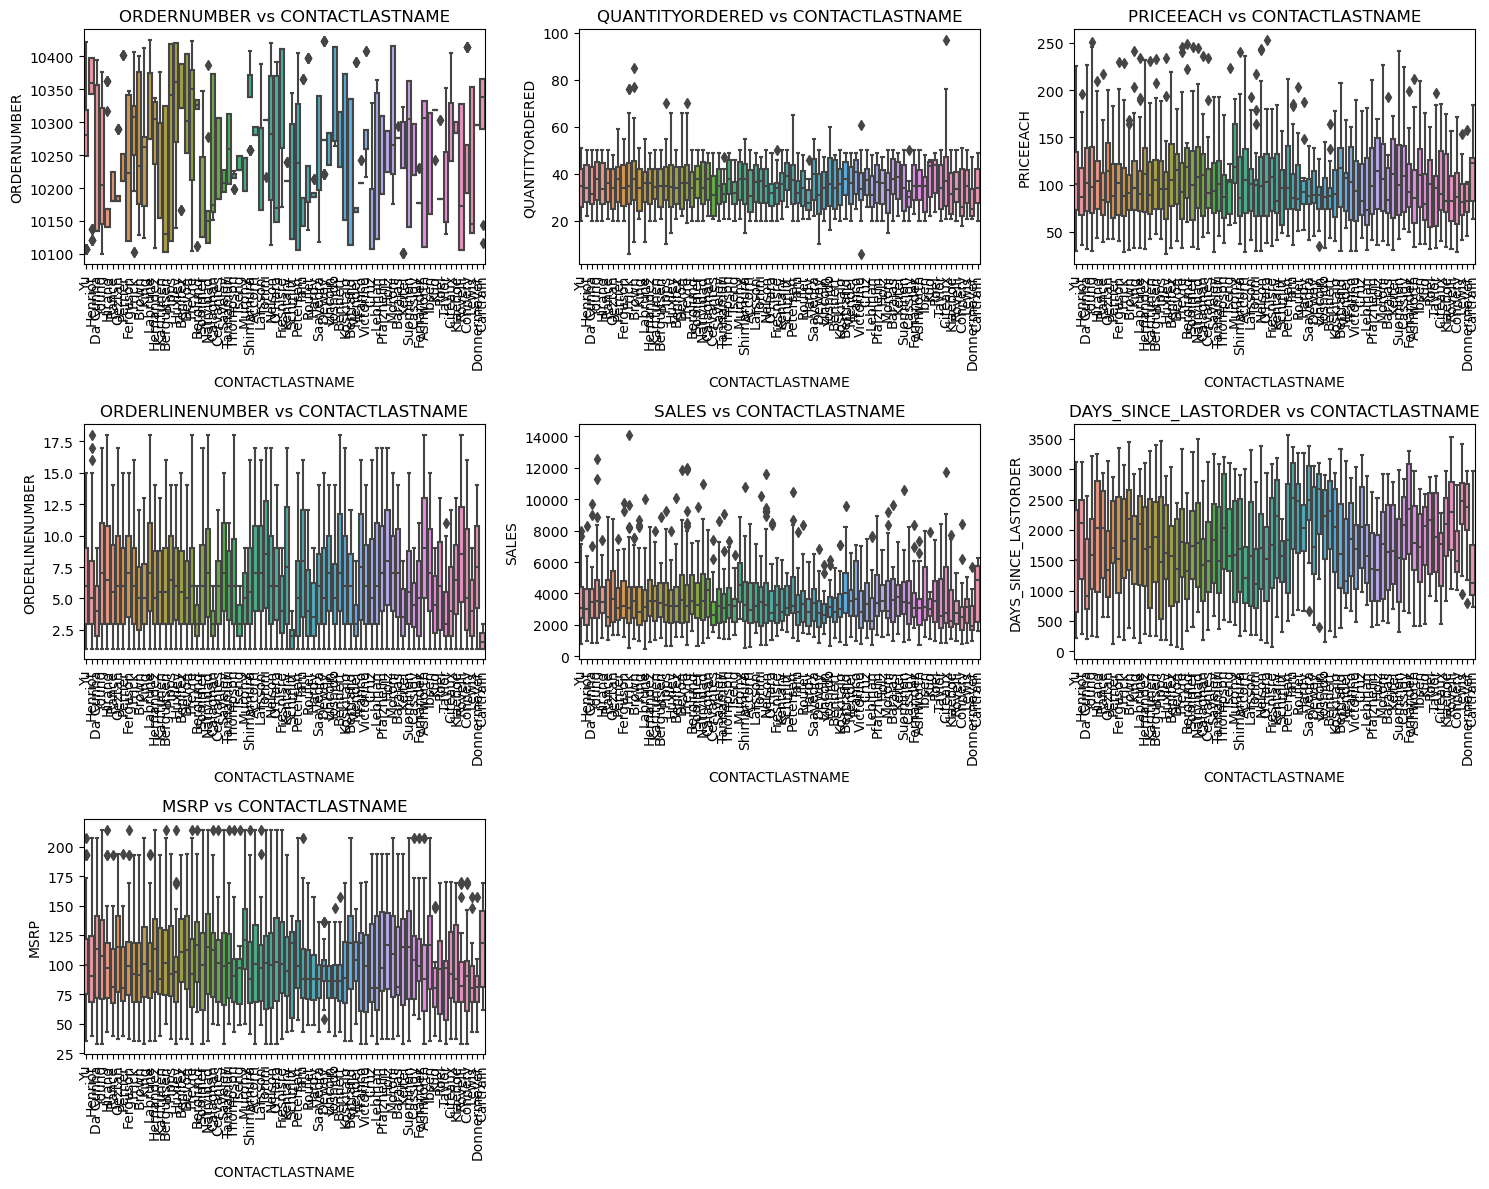



bivariate analysis for CONTACTFIRSTNAME


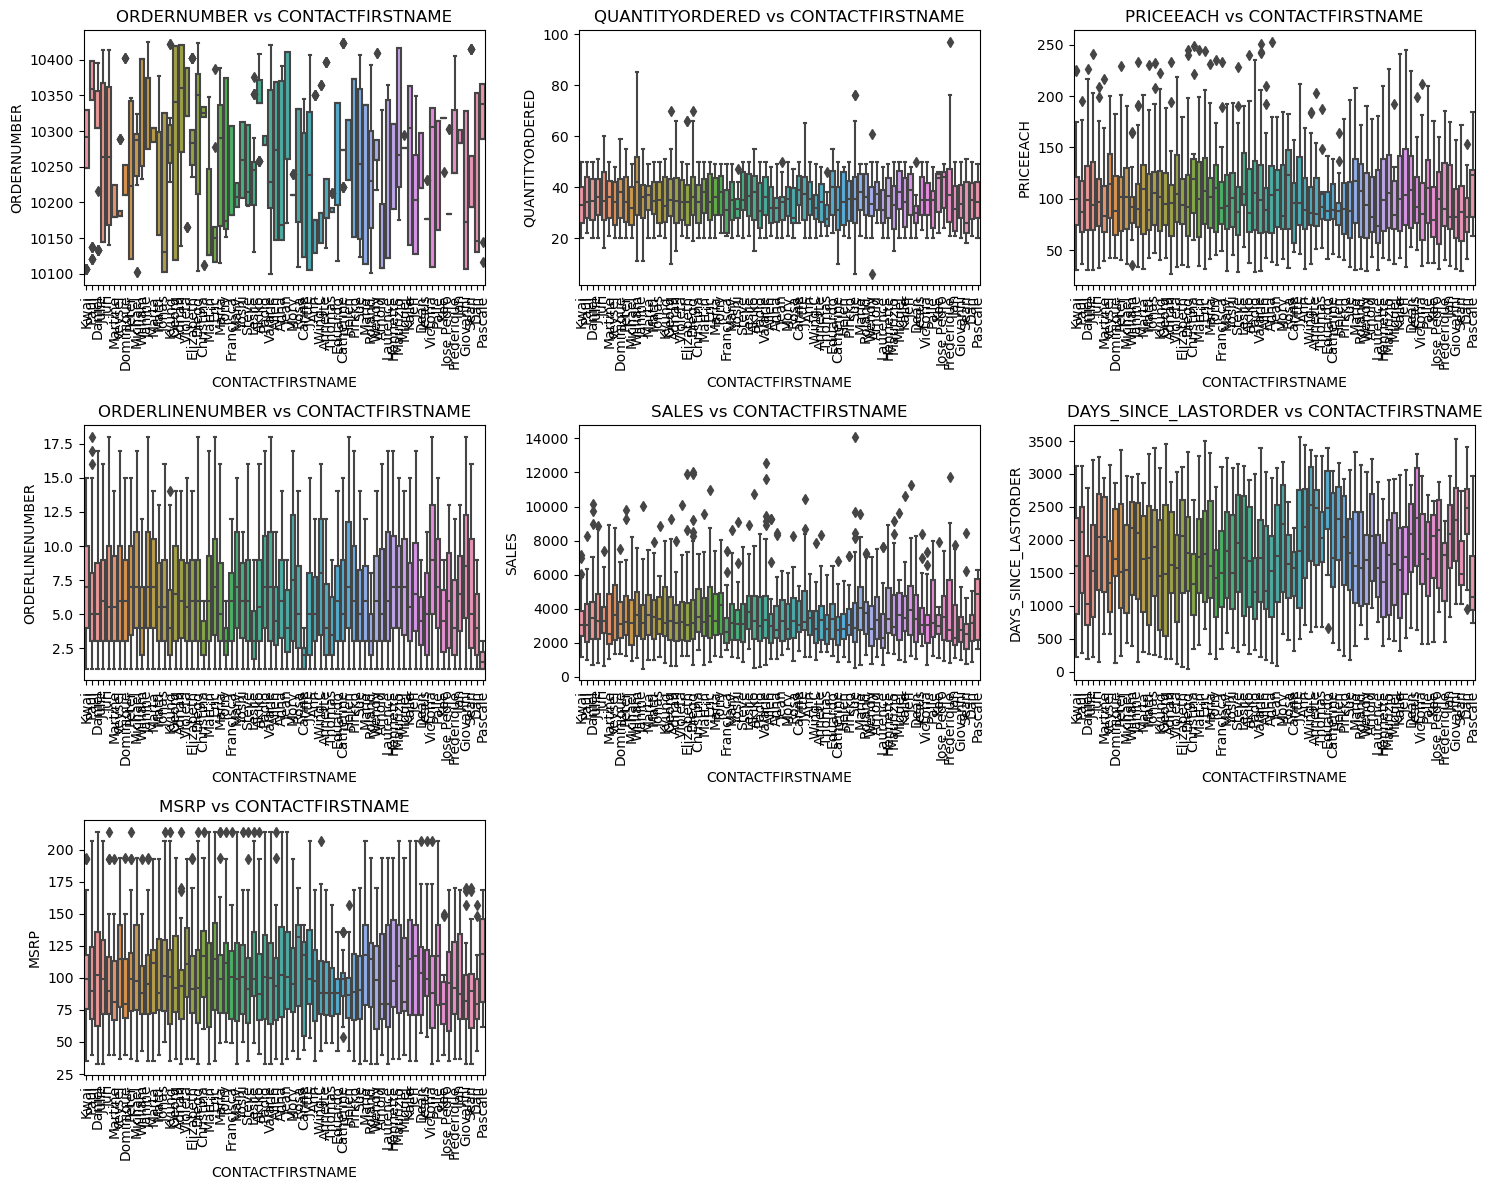



bivariate analysis for DEALSIZE


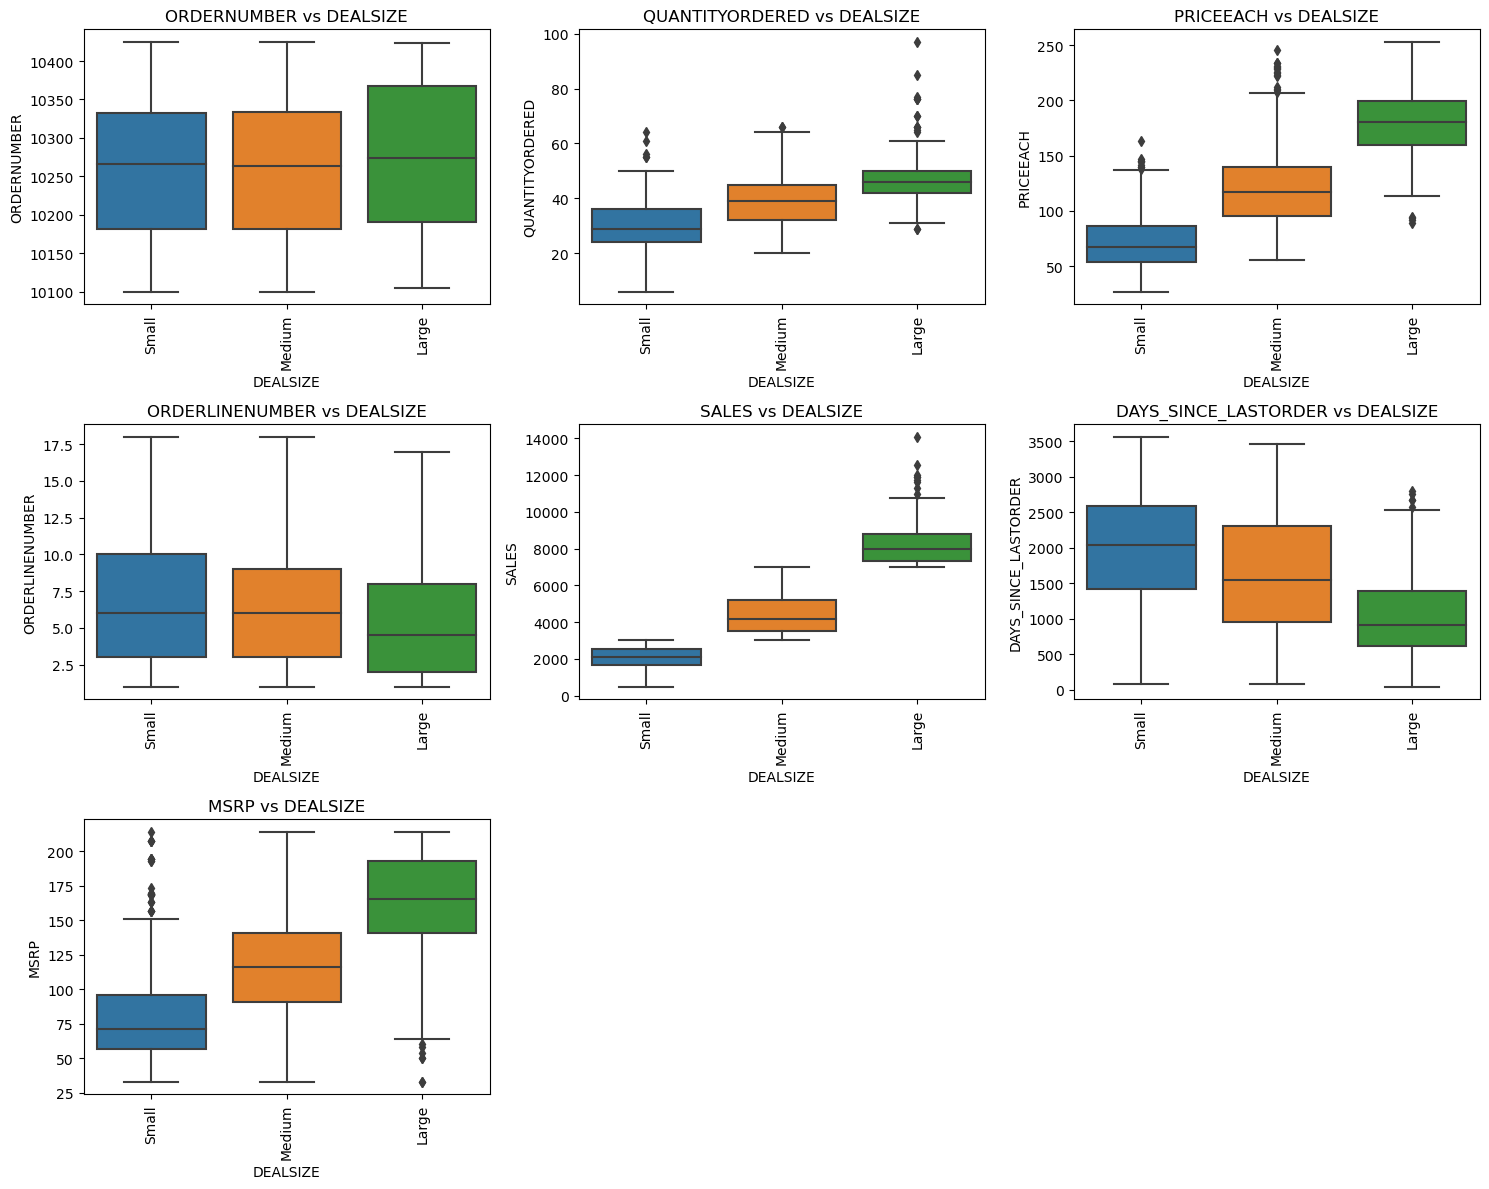

In [12]:
# calling the function
for cat_col in sales_data.select_dtypes(include='object').columns:
    print(f'bivariate analysis for {cat_col}')
    num_cat_bivariate(sales_data,cat_col, sales_data.select_dtypes(include='number').columns)
    print('\n')

#### Key Observations
* Most of the cancelled orders are associated with lower order numbers, while resolved orders are tied to higher order numbers, indicating that recent order disputes are being resolved.
* Disputed and on-hold orders tend to have higher quantities and values, requiring careful attention in dispute resolution.
* Among product lines, classic cars outperform others in terms of product pricing and overall sales value.
* Larger orders typically involve higher-priced products and show a shorter time gap between the previous order and repeat orders.
# Problem 2
## Problem Statement
The goal of this analysis is to thoroughly examine the point of sales data for a grocery store to identify the most frequently purchased item combinations in customer orders. These insights will be used to design combo deals and discount offers that can help boost the store's revenue.
## Data Dictionary
* Date: It denotes the date on which trandsaction was done on POS.
* Order_id: Customer order number.
* Product: Product ordered.
## Loading Data

In [13]:
basket_data = pd.read_csv('D:/Kartik/GL MDS/Study_data/Assingnment_files/MRA/dataset_group.csv')

## Data Overview

In [14]:
data_overview(basket_data)

a glimpse of the data
----------------------------------------------------------------------------


Date  Order_id        Product
0  01-01-2018         1         yogurt
1  01-01-2018         1           pork
2  01-01-2018         1  sandwich bags
3  01-01-2018         1     lunch meat
4  01-01-2018         1   all- purpose



shape of the dataset
----------------------------------------------------------------------------


(20641, 3)



statistical summary
----------------------------------------------------------------------------


count        mean         std  min    25%    50%    75%     max
Order_id  20641.0  575.986289  328.557078  1.0  292.0  581.0  862.0  1139.0



information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


None



missing values
----------------------------------------------------------------------------


Date        0
Order_id    0
Product     0
dtype: int64



checking for duplicates
----------------------------------------------------------------------------
number of dupliacte rows: 4730


value counts for Date
----------------------------------------------------------------------------
Date
08-02-2019    183
20-02-2019    146
06-03-2018    134
01-03-2018    127
17-05-2018    123
             ... 
03-09-2019      5
05-09-2019      4
24-09-2018      4
11-03-2019      4
26-02-2020      3
Name: count, Length: 603, dtype: int64


value counts for Product
----------------------------------------------------------------------------
Product
poultry                         640
soda                            597
cereals                         591
ice cream                       579
cheeses                         578
waffles                         575
soap                            574
bagels                          573
lunch meat                      573
juice                           570
eggs                            570
toilet paper   

#### Key Observations
* Dataset has 20641 rows and 3 colymns.
* There are no missing values in the data.
* There are duplicates in the data which when doing market basket analysis we will convert it to set.
* There are over 30 unique products being sold by the grocery store, for EDA we will segment these products into 5 categories and will perform the analysis based on these categories.
## Exploratory Data Analysis
### Univariate Analysis
#### For Numeric Columns

Skewness of Order_id:  -0.028070215833656792
Distribution of Order_id
----------------------------------------------------------------------------


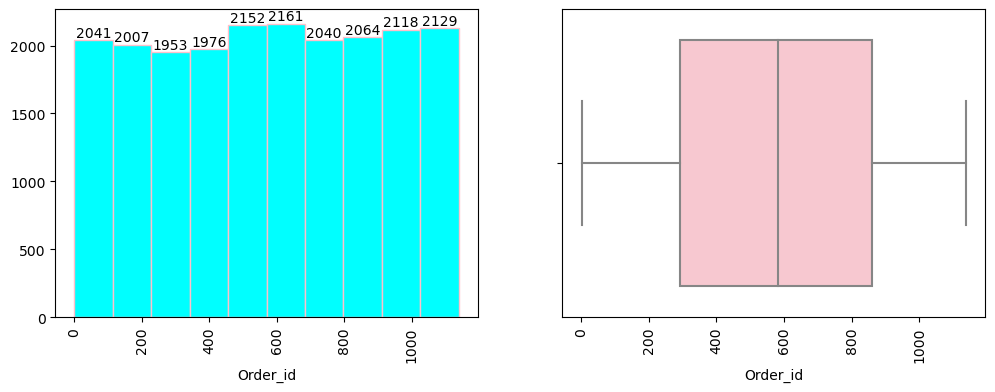

In [15]:
univariateAnalysis_numeric(basket_data, 'Order_id')

## Data Pre-processing

In [16]:
basket_data['Product'].unique()

array(['yogurt', 'pork', 'sandwich bags', 'lunch meat', 'all- purpose',
       'flour', 'soda', 'butter', 'beef', 'aluminum foil', 'dinner rolls',
       'shampoo', 'mixes', 'soap', 'laundry detergent', 'ice cream',
       'toilet paper', 'hand soap', 'waffles', 'cheeses', 'milk',
       'dishwashing liquid/detergent', 'individual meals', 'cereals',
       'tortillas', 'spaghetti sauce', 'ketchup', 'sandwich loaves',
       'poultry', 'bagels', 'eggs', 'juice', 'pasta', 'paper towels',
       'coffee/tea', 'fruits', 'sugar'], dtype=object)

### Segmenting Products into Different Categories

In [17]:
category_dict = {
    'Perishable Food Items': ['yogurt', 'cheeses', 'milk', 'butter', 'eggs', 'lunch meat', 'ice cream', 
                              'waffles', 'individual meals', 'pork', 'beef', 'poultry', 'fruits'],
    'Non-Perishable Food Items': ['flour', 'sugar', 'spaghetti sauce', 'ketchup', 'cereals', 
                                  'tortillas', 'pasta', 'mixes', 'coffee/tea', 'soda', 'juice'],
    'Household & Cleaning Supplies': ['aluminum foil', 'sandwich bags', 'paper towels', 'toilet paper', 
                                      'dishwashing liquid/detergent', 'laundry detergent', 'shampoo', 
                                      'soap', 'hand soap'],
    'Bakery & Bread': ['dinner rolls', 'bagels', 'sandwich loaves'],
    'All-Purpose': ['all-purpose']
}

In [18]:
# Function to assign category
def assign_category(product):
    for category, products in category_dict.items():
        if product in products:
            return category
    return 'Uncategorized'  # If a product is not found in any category

# Create the 'Categories' column
basket_data['Categories'] =basket_data['Product'].apply(assign_category)



In [19]:
basket_data.head()

Date  Order_id        Product                     Categories
0  01-01-2018         1         yogurt          Perishable Food Items
1  01-01-2018         1           pork          Perishable Food Items
2  01-01-2018         1  sandwich bags  Household & Cleaning Supplies
3  01-01-2018         1     lunch meat          Perishable Food Items
4  01-01-2018         1   all- purpose                  Uncategorized

In [22]:
basket_data['Categories'].value_counts()

Categories
Perishable Food Items            7335
Non-Perishable Food Items        6134
Household & Cleaning Supplies    4958
Bakery & Bread                   1663
Uncategorized                     551
Name: count, dtype: int64

## Exporting Updated Dataframe

In [27]:
basket_data.to_excel('D:/Kartik/GL MDS/Study_data/Assingnment_files/MRA/Basket_Data.xlsx')